<a href="https://colab.research.google.com/github/Aritra-Bag/Depression-Detection/blob/main/Depression%20Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Depression/Anxity Detection using Machine Learning** - based on Social Midea Posts

---



In [ ]:
# Dataset link- https://www.kaggle.com/datasets/nidhiy07/student-depression-text/data

# Importing Libraries

In [ ]:
!pip install tensorflow==2.12.0 numpy==1.23.5 scipy==1.10.1 gensim==4.3.1


import os
os.kill(os.getpid(), 9)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 3.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 96.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 74.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 82.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 73.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 104.8 MB/s eta 0:00:00
   ━

In [ ]:
### ___packages___ ###
# Standard
import numpy as np
import pandas as pd
import re, string

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn (classical baselines)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# Preprocessing & Cleaning
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# NLP & Deep Learning
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (Embedding, Conv1D, GlobalMaxPooling1D,
                                     Dropout, Dense, Bidirectional, LSTM,
                                     Input)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.utils import unpack_x_y_sample_weight
from transformers import BertTokenizer, TFBertModel, TFBertForSequenceClassification, AdamWeightDecay

In [ ]:
from gensim.models import KeyedVectors

# 1. About Dataset

In [ ]:
# This dataset contains information in excel format which comprises around 7489 data from social media, Facebook comments, posts, etc.
# All the people selected for data annotation are very well in English Language and are students , age range . 15 to 17
# There are 5 columns in this dataset. Text , labels, Age , Age Category and Gender .
# Normal and anxiety/depression text is present in the text columns, and the label column indicates whether the corresponding text denotes anxiety or depression.

In [ ]:
# 1. Load & Inspect Dataset
df = pd.read_excel('/content/Depression_Text.xlsx')

In [ ]:
print("Shape:", df.shape)

Shape: (7489, 5)


In [ ]:
df

,text,label,Age,Gender,Age Category
0,let Gather For Party,0.0,16.0,Male,Teen Age
1,I hate being alive when I feel so dead inside.,1.0,17.0,Female,Teen Age
2,Exam are Comimg I m already Feeling Very Dep...,1.0,16.0,Male,Teen Age
3,Nice picture,0.0,16.0,Male,Teen Age
4,"Feeling worried, even though you actually have...",1.0,16.0,Male,Teen Age
...,...,...,...,...,...
7484,"""Nothing beats the feeling of achieving someth...",0.0,16.0,Female,Teen Age
7485,Too much homework Feeling Stressed!,1.0,16.0,Female,Teen Age
7486,"overworked in school,, causes me headache",1.0,16.0,Female,Teen Age
7487,How come my friends immediately get to know st...,0.0,16.0,Female,Young Age


In [ ]:
print(f"Shape of The Student  Dataset : {df.shape}")
print(f"Glimpse of The Dataset :")
df.head()

Shape of The Student  Dataset : (7489, 5)
Glimpse of The Dataset :


,text,label,Age,Gender,Age Category
0,let Gather For Party,0.0,16.0,Male,Teen Age
1,I hate being alive when I feel so dead inside.,1.0,17.0,Female,Teen Age
2,Exam are Comimg I m already Feeling Very Dep...,1.0,16.0,Male,Teen Age
3,Nice picture,0.0,16.0,Male,Teen Age
4,"Feeling worried, even though you actually have...",1.0,16.0,Male,Teen Age


In [ ]:
print(f"Informations About Dataset :\n")
print(df.info())

Informations About Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7489 entries, 0 to 7488
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   text          7476 non-null   object 
 1   label         7486 non-null   float64
 2   Age           7486 non-null   float64
 3   Gender        7486 non-null   object 
 4   Age Category  7486 non-null   object 
dtypes: float64(2), object(3)
memory usage: 292.7+ KB
None


In [ ]:
print(f"Summary of The  Dataset :")
df.describe().T

Summary of The  Dataset :


,count,mean,std,min,25%,50%,75%,max
label,7486.0,0.163906,0.370215,0.0,0.0,0.0,0.0,1.0
Age,7486.0,15.379108,1.058104,13.0,14.0,15.0,16.0,17.0


In [ ]:
df.describe(include=object).T

,count,unique,top,freq
text,7476,7370,ni-ki best boy,11
Gender,7486,2,Male,4062
Age Category,7486,2,Young Age,3974


# 2. Preprocessing & Cleaning

## NULL Values Removal

In [ ]:
# NULL VALUE REMOVAL

print("Null Values of Dataset :")
df.isna().sum().to_frame().T


Null Values of Dataset :


,text,label,Age,Gender,Age Category
0,13,3,3,3,3


In [ ]:
# Display rows with any null values
print(df[df.isnull().any(axis=1)])


     text  label   Age  Gender Age Category
139   NaN    NaN   NaN     NaN          NaN
140   NaN    NaN   NaN     NaN          NaN
141   NaN    NaN   NaN     NaN          NaN
845   NaN    0.0  16.0    Male     Teen Age
1416  NaN    1.0  17.0    Male     Teen Age
1439  NaN    1.0  17.0    Male     Teen Age
1985  NaN    0.0  17.0    Male     Teen Age
2574  NaN    0.0  14.0    Male    Young Age
2596  NaN    0.0  14.0    Male    Young Age
2879  NaN    0.0  14.0    Male    Young Age
3230  NaN    1.0  14.0    Male    Young Age
3717  NaN    0.0  15.0    Male    Young Age
7279  NaN    0.0  15.0  Female    Young Age


In [ ]:
print("After Dropping, Null Values of  Dataset :")
df.dropna(axis = 0, inplace = True)
df.isna().sum().to_frame().T

After Dropping, Null Values of  Dataset :


,text,label,Age,Gender,Age Category
0,0,0,0,0,0


In [ ]:
dup_df = df[df.duplicated()].shape[0]
print(f"There are {dup_df} duplicate entries among {df.shape[0]} entries in  dataset.")

There are 34 duplicate entries among 7476 entries in  dataset.


In [ ]:
df = df.sample(frac = 1)

In [ ]:
df['label'].value_counts().to_frame().T

label,0.0,1.0
count,6252,1224


In [ ]:
print("Unique categories in each column:")
for col in ['label', 'Age', 'Gender', 'Age Category']:
  print(f"\nColumn: {col}")
  print(df[col].unique())


Unique categories in each column:

Column: label
[0. 1.]

Column: Age
[17. 15. 14. 16. 13.]

Column: Gender
['Male' 'Female']

Column: Age Category
['Teen Age' 'Young Age']


# Dataset Visualization

## 1) Age Distribution

Text(0, 0.5, 'Freq')

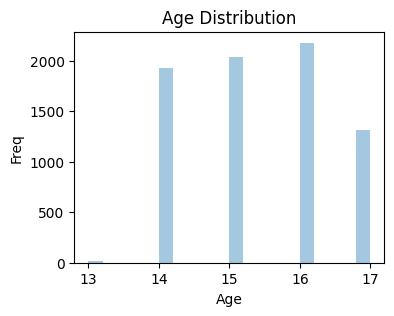

In [ ]:
fig,ax = plt.subplots(figsize=(4,3))
sns.distplot(df['Age'].dropna(),ax=ax,kde=False)
plt.title('Age Distribution')
plt.ylabel('Freq')

## 2) Glimpse of Age of Students

Glimpse of The Age of Students :


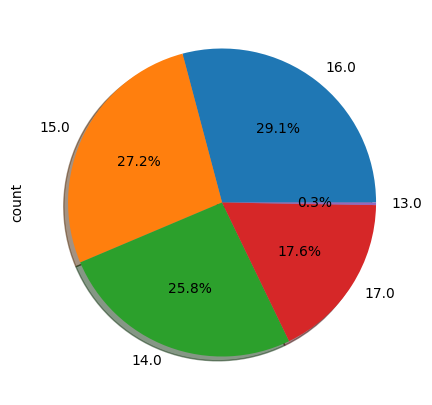

In [ ]:
print(f"Glimpse of The Age of Students :")
df['Age'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, figsize=(5,5))
plt.show()


In [ ]:
df['Age'].value_counts()
# Data for Age 13 is very less

,count
Age,
16.0,2178
15.0,2036
14.0,1929
17.0,1313
13.0,20


## 3) Glimpse of Relation Between Gender and Age  of Students

Glimpse of Relation Between Gender and Age  of Students :


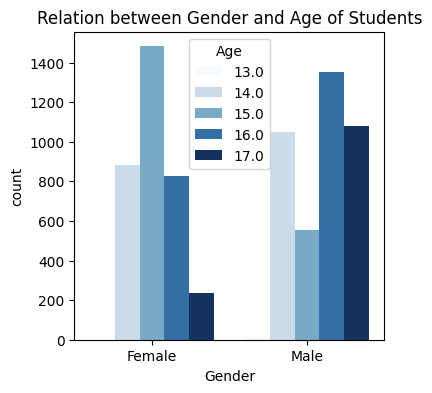

In [ ]:
print(f"Glimpse of Relation Between Gender and Age  of Students :")
plt.figure(figsize=(4, 4))
sns.countplot(x='Gender', hue='Age', data=df, palette='Blues')
plt.title('Relation between Gender and Age of Students')
plt.show()


## 4) Glimpse of Relation Between *Label - Age Group* and *Label - Gender* of Students

Glimpse of Relation Between Label and - 'Age Group' and 'Gender' of Students


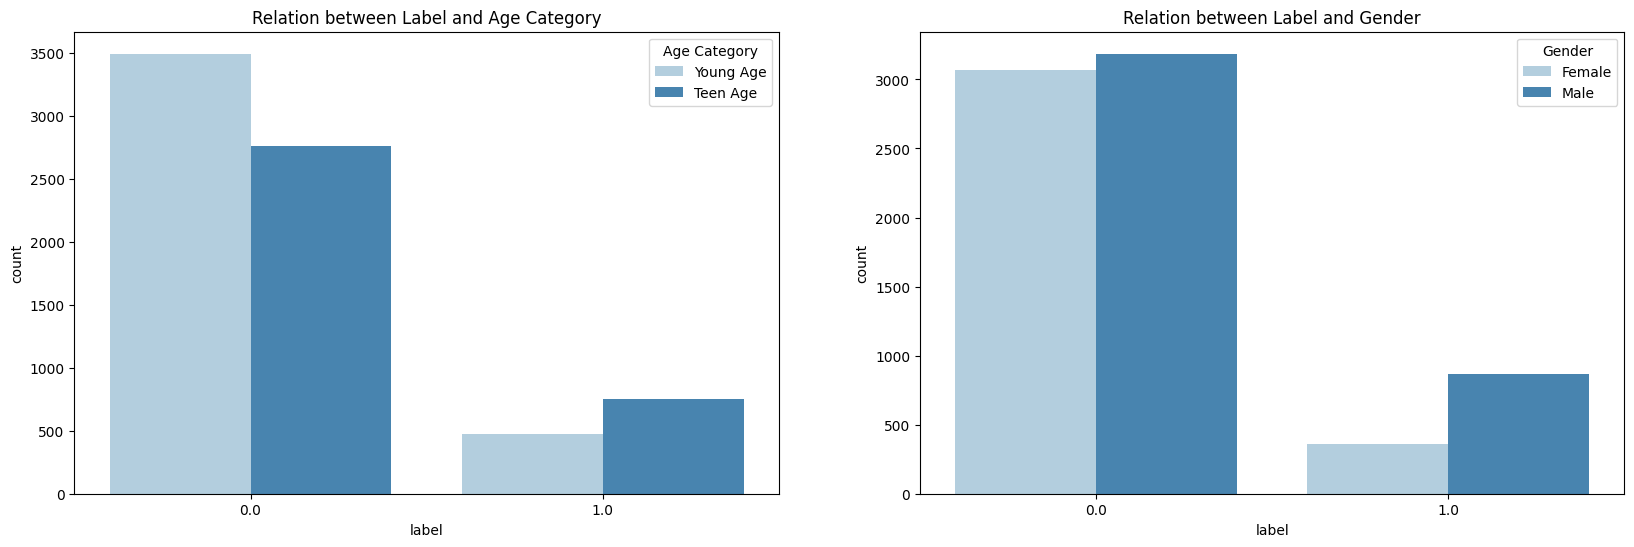

In [ ]:
print(f"Glimpse of Relation Between Label and - 'Age Group' and 'Gender' of Students")
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='label', hue='Age Category', data=df, palette='Blues')
plt.title('Relation between Label and Age Category')

plt.subplot(1, 2, 2)
sns.countplot(x='label', hue='Gender', data=df, palette='Blues')
plt.title('Relation between Label and Gender')

plt.show()


## 5) Label Distribution

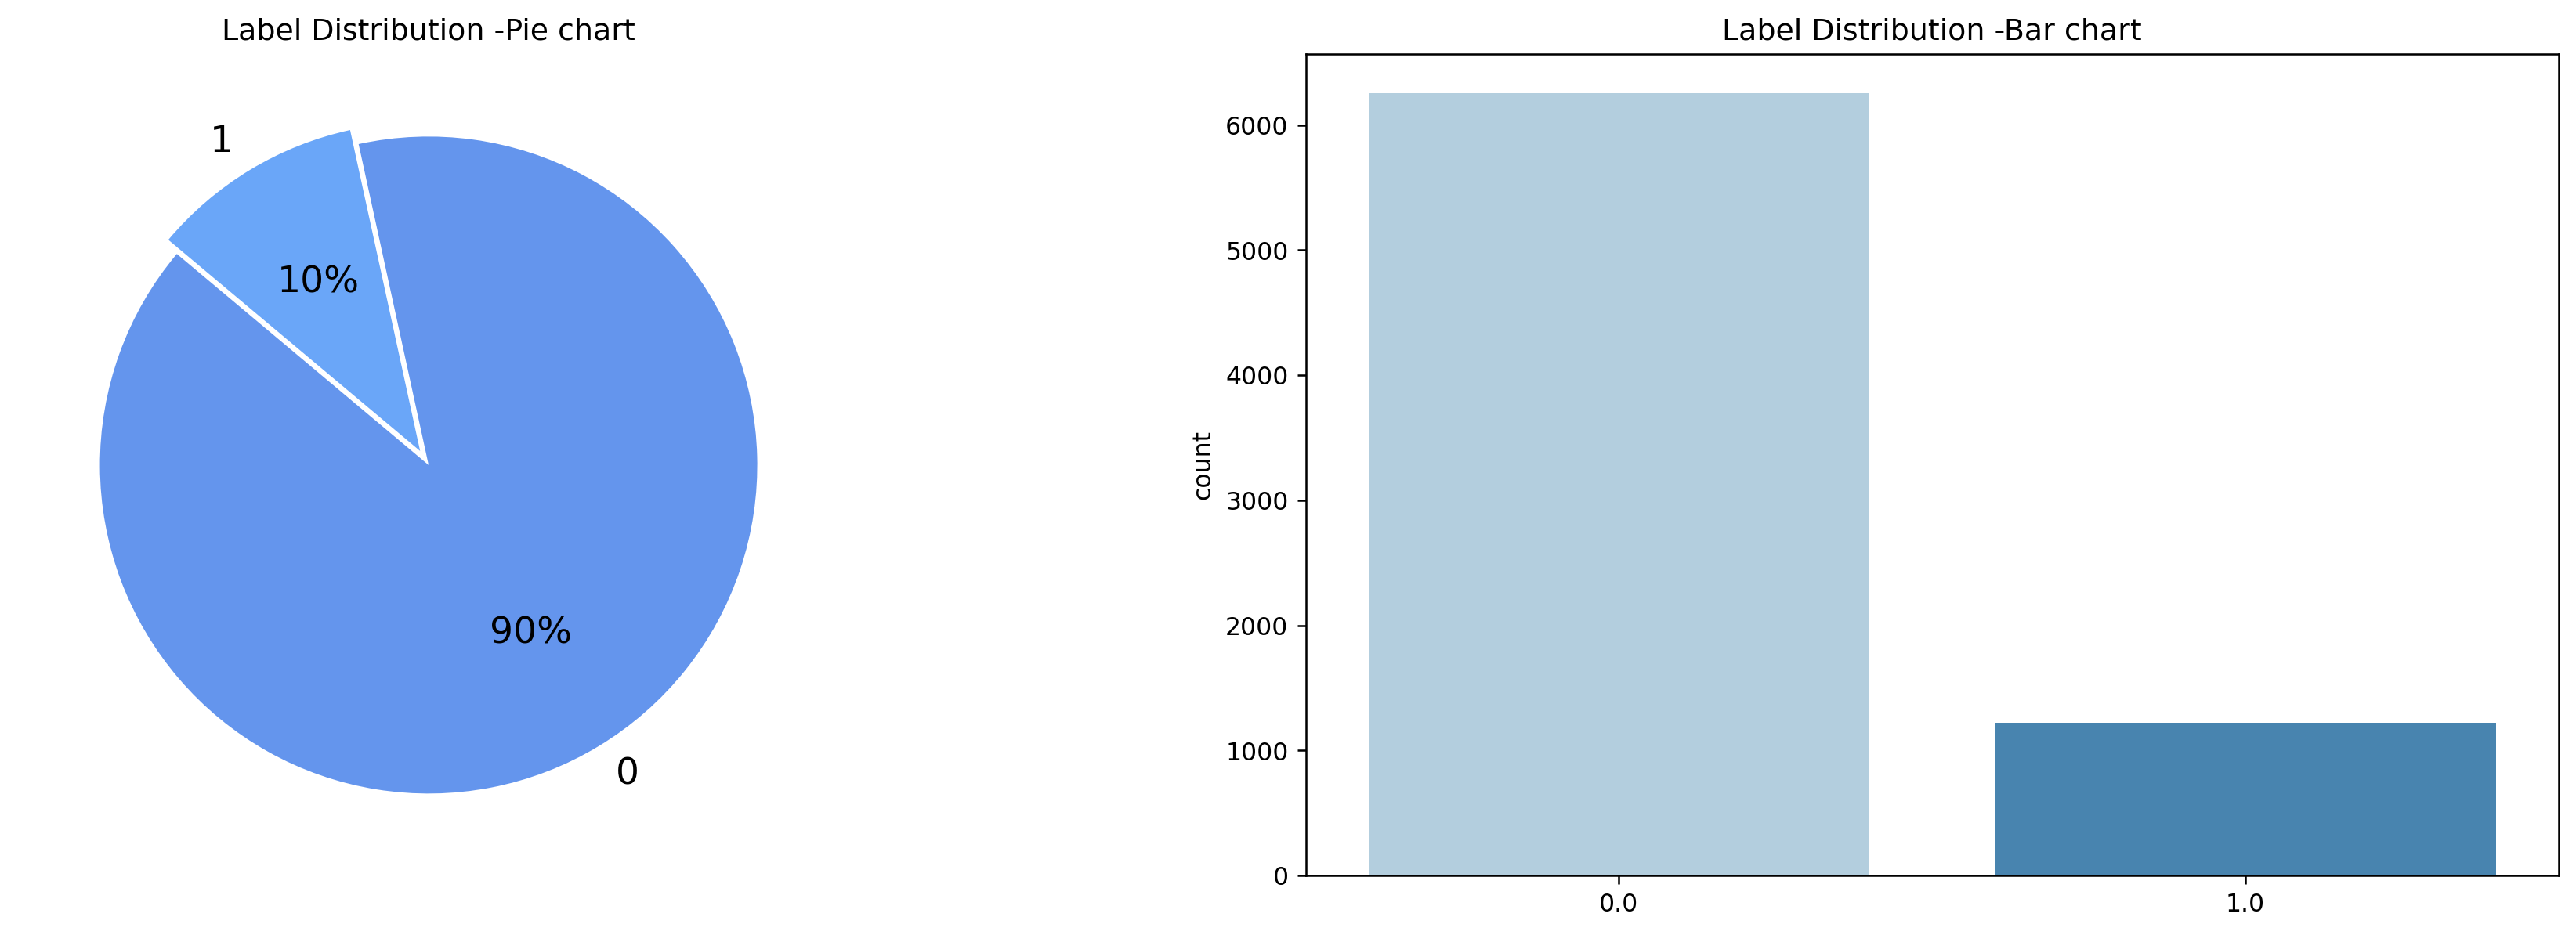

In [ ]:
labels = [0, 1]
sizes = [6240, 730]
custom_colours = ['#6495ED', '#6AA6F8']

plt.figure(figsize=(20, 6), dpi=227)

plt.subplot(1, 2, 1)
plt.pie(sizes, labels = labels, textprops={'fontsize': 15}, startangle=140,
       autopct='%1.0f%%', colors=custom_colours, explode=[0, 0.05])
plt.title('Label Distribution -Pie chart')

plt.subplot(1, 2, 2)
sns.barplot(x = df['label'].unique(), y = df['label'].value_counts(), palette='Blues')
plt.title('Label Distribution -Bar chart')

plt.show()

Label Distribution:

*   0 -> Normal
*   1 -> anxiety/depression


# Preprocessing Text

In [ ]:
# NLTK
def text_transformation(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)            # remove bracketed content
    text = re.sub("\\W"," ", text)                # non-word chars → space
    text = re.sub('https?://\S+|www\.\S+', '', text)  # strip URLs
    text = re.sub('<.*?>+', '', text)             # strip HTML tags
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)                 # remove newlines
    text = re.sub('\w*\d\w*', '', text)           # remove tokens containing digits
    return text


In [ ]:
def text_cleaner(text):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text  # remove any embedded HTML
    newString = re.sub(r'\([^)]*\)', '', newString)    # drop parenthetical phrases
    newString = re.sub('"','', newString)              # strip quotes
    # expand contractions
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString)   # keep only letters
    newString = re.sub('[m]{2,}', 'mm', newString)     # normalize repeated “m”
    return newString

# Contraction Mapping

In [ ]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [ ]:
print(df)

                                                   text  label   Age  Gender  \
2416                                      easy to sleep    0.0  17.0    Male   
3710  Gais sorry sorry, I should be silent. But I re...    0.0  15.0    Male   
3902                                         deseo pene    0.0  15.0    Male   
3451                Oh my, I'm the one who's worried :(    1.0  14.0    Male   
4768                              4 o'clock is too long    0.0  16.0  Female   
...                                                 ...    ...   ...     ...   
7010                                     Urusei yatsura    0.0  15.0  Female   
6812                 wait, I forgot how to send menfess    0.0  15.0  Female   
339   "I understand how you feel, be patient" is ano...    0.0  16.0    Male   
1242                             Hurry up for raya food    0.0  16.0    Male   
1035  Finishing business on time is a joy. Drink whe...    0.0  16.0    Male   

     Age Category  
2416     Teen Age  

In [ ]:
df['cleaned'] = df["text"].apply(text_cleaner)

# Visualizing WordCloud


Glimpse of Student Text WordCloud :


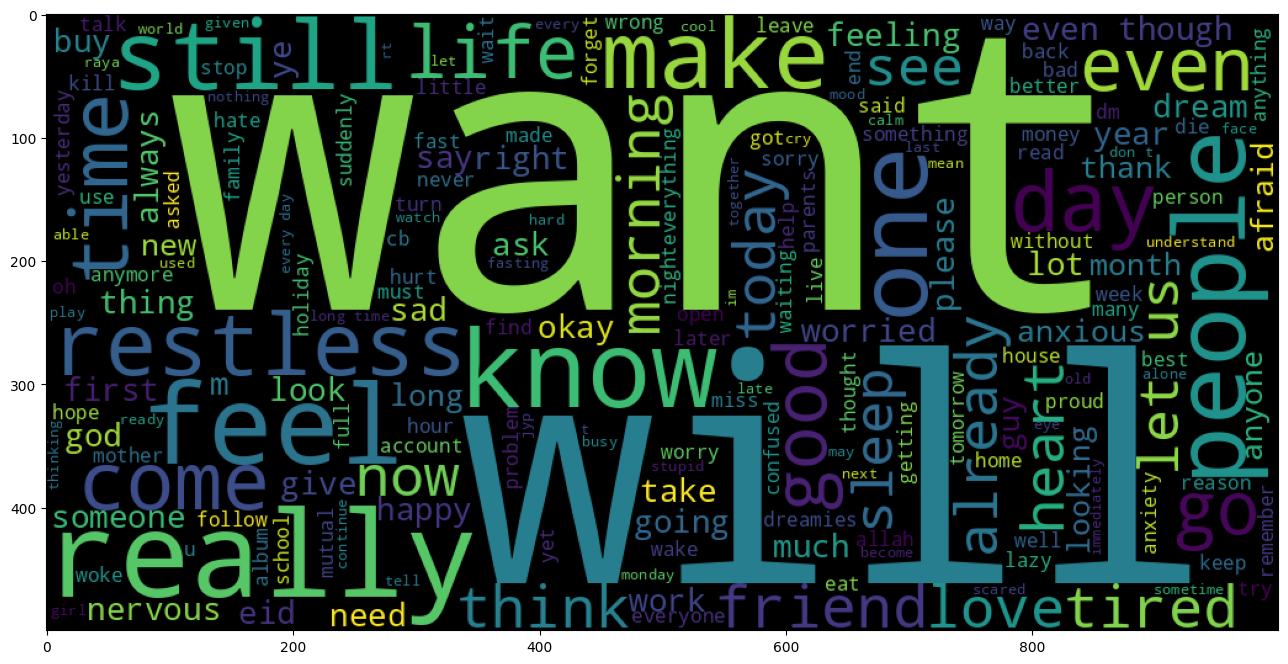

In [ ]:
# Concatenates all cleaned tokens into one big string,
# generates a visual “word cloud” to reveal the most frequent terms across the dataset.
print(f"Glimpse of Student Text WordCloud :")

import matplotlib
from wordcloud import WordCloud

matplotlib.rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in df['cleaned']:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='black',min_font_size = 6).generate(word_cloud)
plt.imshow(wordcloud)

In [ ]:
# Separately gathers all tokens for-
# the non-depressed (label 0) and depressed (label 1) groups
# for later comparative analyses.
text_0 = " ".join(xx for xx in df.text[df.label==0])
text_1 = " ".join(xx for xx in df.text[df.label==1])

Glimpse of NORMAL Text WordCloud :



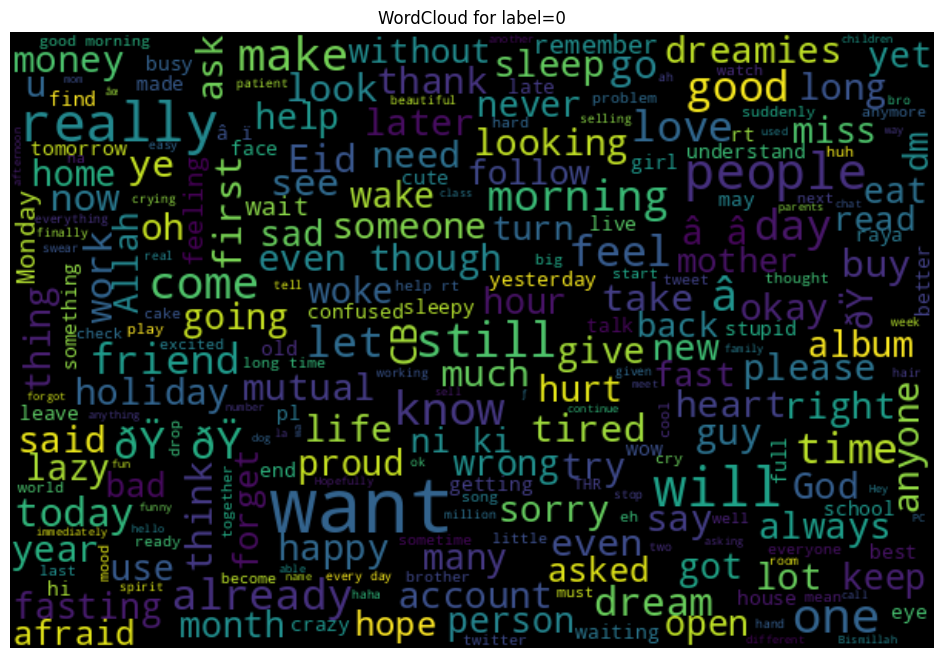

In [ ]:
# Creates and displays a word cloud focused only on the non-depressed participants.
print(f"Glimpse of NORMAL Text WordCloud :\n")

wordcloud = WordCloud( max_font_size=50, max_words=250,
                      width = 600, height = 400,
                      background_color='black').generate(text_0)
plt.figure(figsize=(12,8))
plt.title('WordCloud for label=0')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Glimpse of DEPRESSED Text WordCloud :



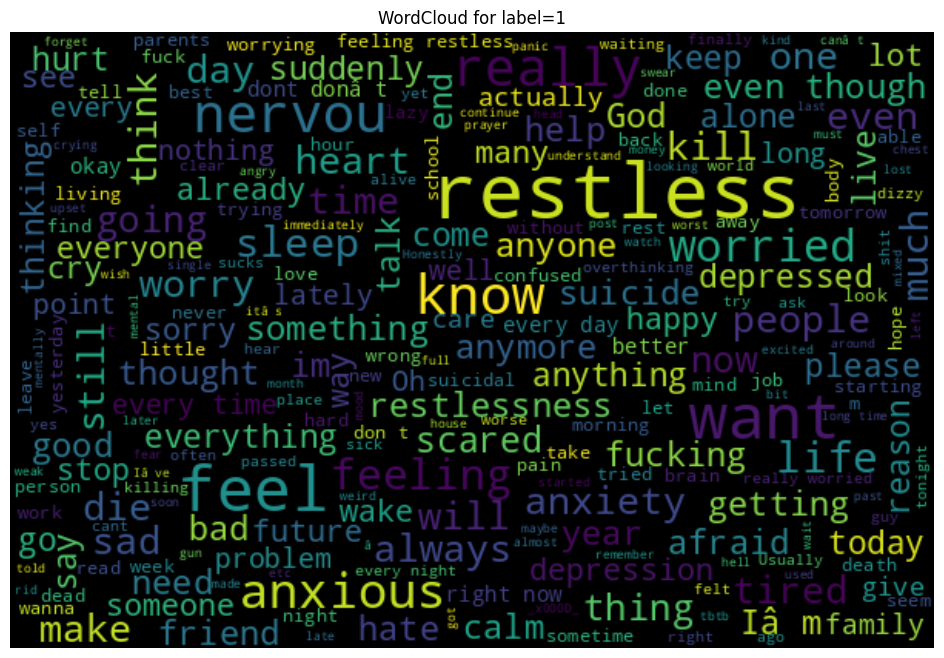

In [ ]:
# Generates the analogous word cloud for the depressed subgroup.
print(f"Glimpse of DEPRESSED Text WordCloud :\n")

wordcloud = WordCloud( max_font_size=50, max_words=250,
                      width = 600, height = 400,
                      background_color='black').generate(text_1)
plt.figure(figsize=(12,8))
plt.title('WordCloud for label=1')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

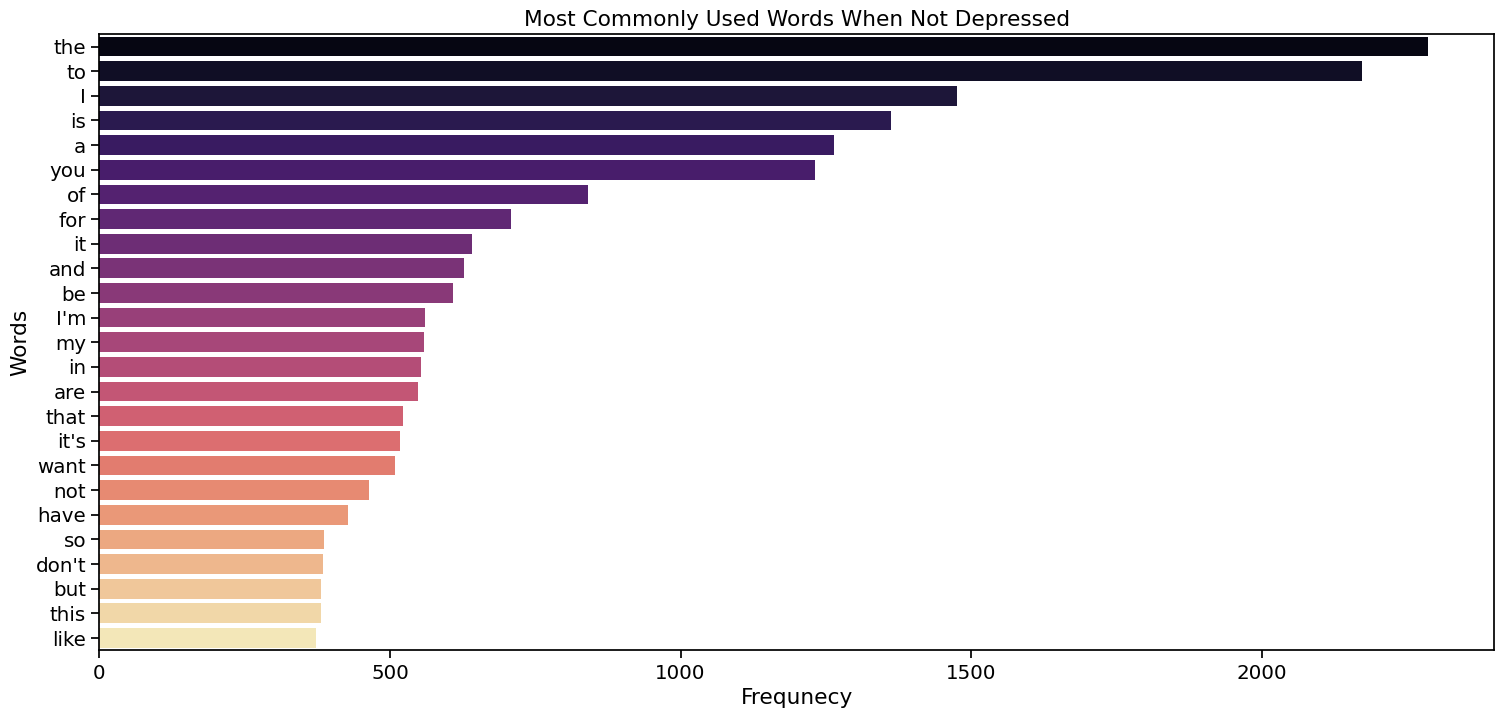

In [ ]:
# Uses Python’s collections.Counter to tally the top 25 words for each group and
# stores them in DataFrames dk (non-depressed) and dl (depressed).

from collections import Counter

all_nodep_words = []  # no depression
for sentence in df[df['label'] == 0]['text'].to_list():
    for word in sentence.split():
        all_nodep_words.append(word)

dk = pd.DataFrame(Counter(all_nodep_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y=dk['Word'], x=dk['Frequency'], palette='magma')
plt.title("Most Commonly Used Words When Not Depressed")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

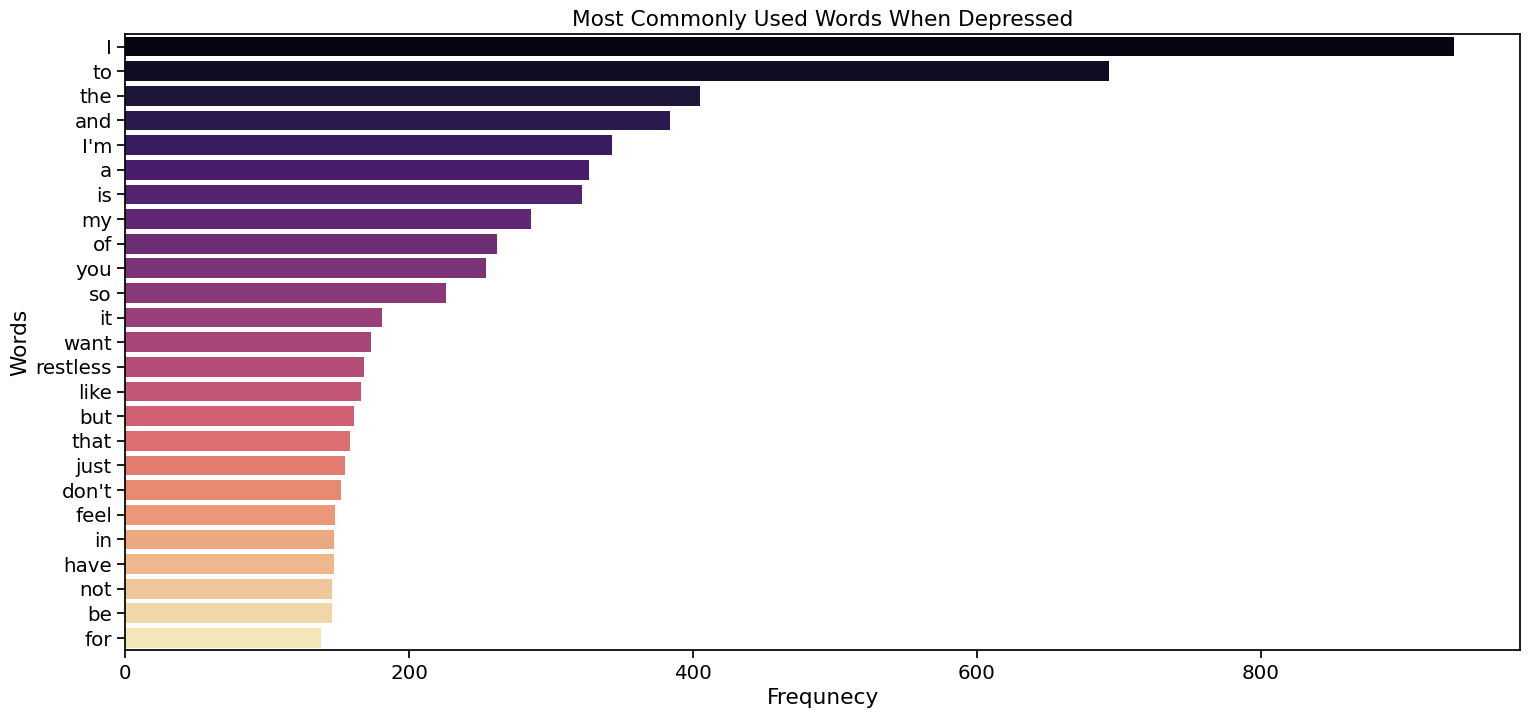

In [ ]:
all_dep_words = []  # depression
for sentence in df[df['label'] == 1]['text'].to_list():
    for word in sentence.split():
        all_dep_words.append(word)

dl = pd.DataFrame(Counter(all_dep_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = dl['Word'], x= dl['Frequency'], palette= 'magma')
plt.title("Most Commonly Used Words When Depressed")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

In [ ]:
df.tail()

,text,label,Age,Gender,Age Category,cleaned
5941,yujew account wants to create CA ™ ™ ™ ™ ™ ™,0.0,14.0,Female,Young Age,yujew account wants to create ca
2210,"Oh Allah, there is a disaster before Eid. spra...",0.0,17.0,Male,Teen Age,oh allah there is a disaster before eid spra...
6009,Coat of arms.[Æ ].Latin letters: Phonetic: Mid...,0.0,15.0,Female,Young Age,coat of arms latin letters phonetic mid...
5311,10 o'clock is too long,0.0,14.0,Female,Young Age,of the clock is too long
119,I'm really tired of dreaming,0.0,16.0,Male,Teen Age,i am really tired of dreaming


# MACHINE LEARNING MODEL

## Feature Extraction with CountVectorizer

In [ ]:
X = df.cleaned
y = df.label

In [ ]:
df.cleaned

,cleaned
2416,easy to sleep
3710,gais sorry sorry i should be silent but i re...
3902,deseo pene
3451,oh my i am the one who is worried
4768,of the clock is too long
...,...
7010,urusei yatsura
6812,wait i forgot how to send menfess
339,i understand how you feel be patient is anoth...
1242,hurry up for raya food


In [ ]:
vect = CountVectorizer(max_features = 20000 , lowercase=False , ngram_range=(1,2))
X_cv = vect.fit_transform(X).toarray()
X_cv = vect.fit_transform(df['cleaned']).toarray()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_cv, y, test_size=0.2, random_state=1, stratify=y
)

## 3. Classical ML Pipeline

In [ ]:
y = df['label'].values
df['label'].values

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
def perf(clf):
    preds = clf.predict(X_test)
    print("Accuracy:", accuracy_score(y_test,preds))
    print(classification_report(y_test,preds))
    sns.heatmap(confusion_matrix(y_test,preds), annot=True, fmt='d')
    plt.show()

## Train & evaluate baselines -- 7 classical ml models

>> LR
Accuracy: 0.9699197860962567
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1251
         1.0       0.92      0.89      0.91       245

    accuracy                           0.97      1496
   macro avg       0.95      0.94      0.94      1496
weighted avg       0.97      0.97      0.97      1496



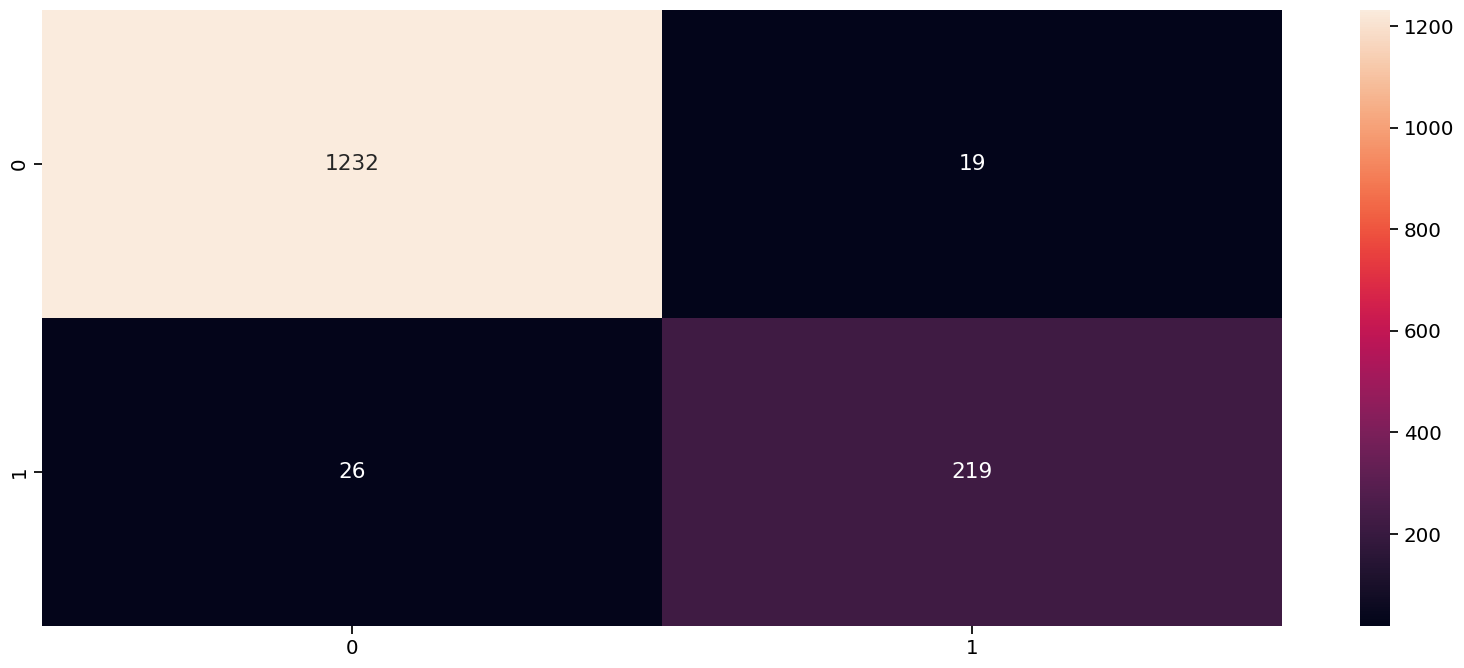

>> NB
Accuracy: 0.928475935828877
              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96      1251
         1.0       0.73      0.89      0.80       245

    accuracy                           0.93      1496
   macro avg       0.85      0.91      0.88      1496
weighted avg       0.94      0.93      0.93      1496



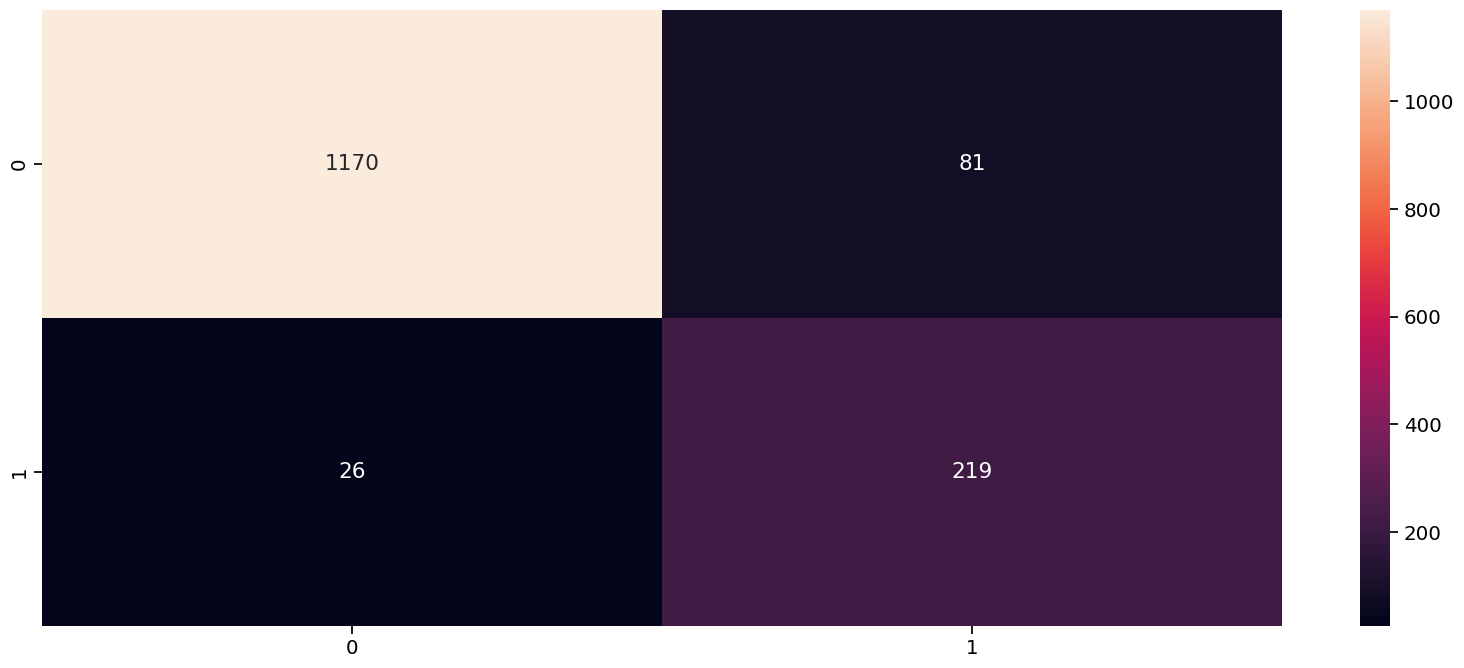

>> DT
Accuracy: 0.93048128342246
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      1251
         1.0       0.78      0.80      0.79       245

    accuracy                           0.93      1496
   macro avg       0.87      0.88      0.87      1496
weighted avg       0.93      0.93      0.93      1496



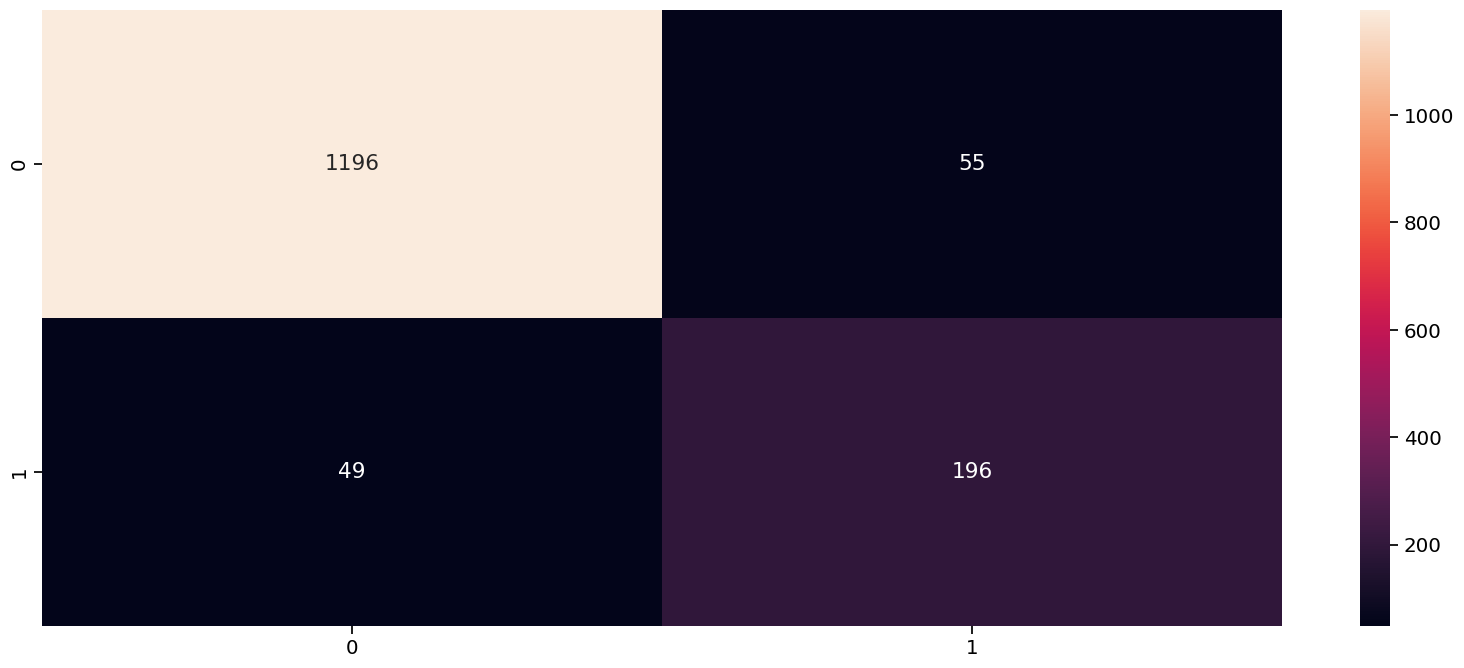

>> SVM
Accuracy: 0.9418449197860963
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97      1251
         1.0       0.96      0.67      0.79       245

    accuracy                           0.94      1496
   macro avg       0.95      0.83      0.88      1496
weighted avg       0.94      0.94      0.94      1496



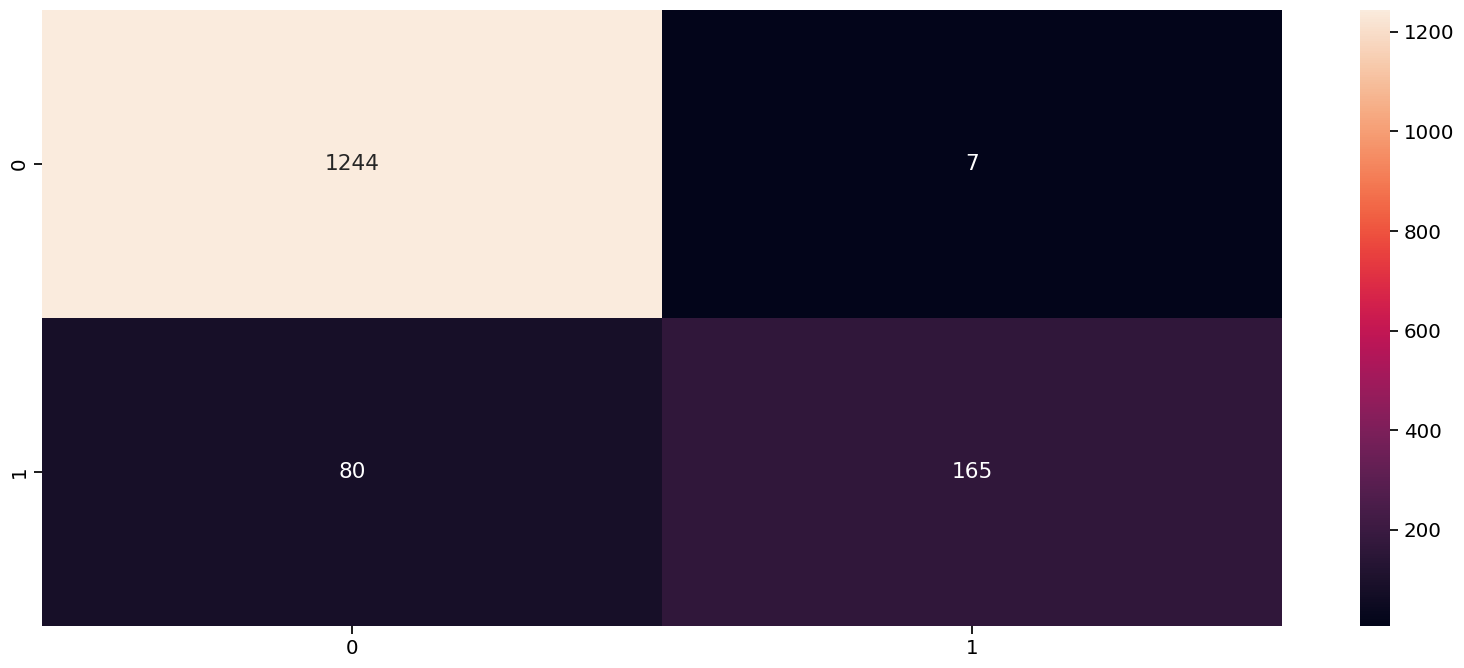

>> Ada
Accuracy: 0.892379679144385
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      1251
         1.0       0.99      0.35      0.51       245

    accuracy                           0.89      1496
   macro avg       0.94      0.67      0.73      1496
weighted avg       0.90      0.89      0.87      1496



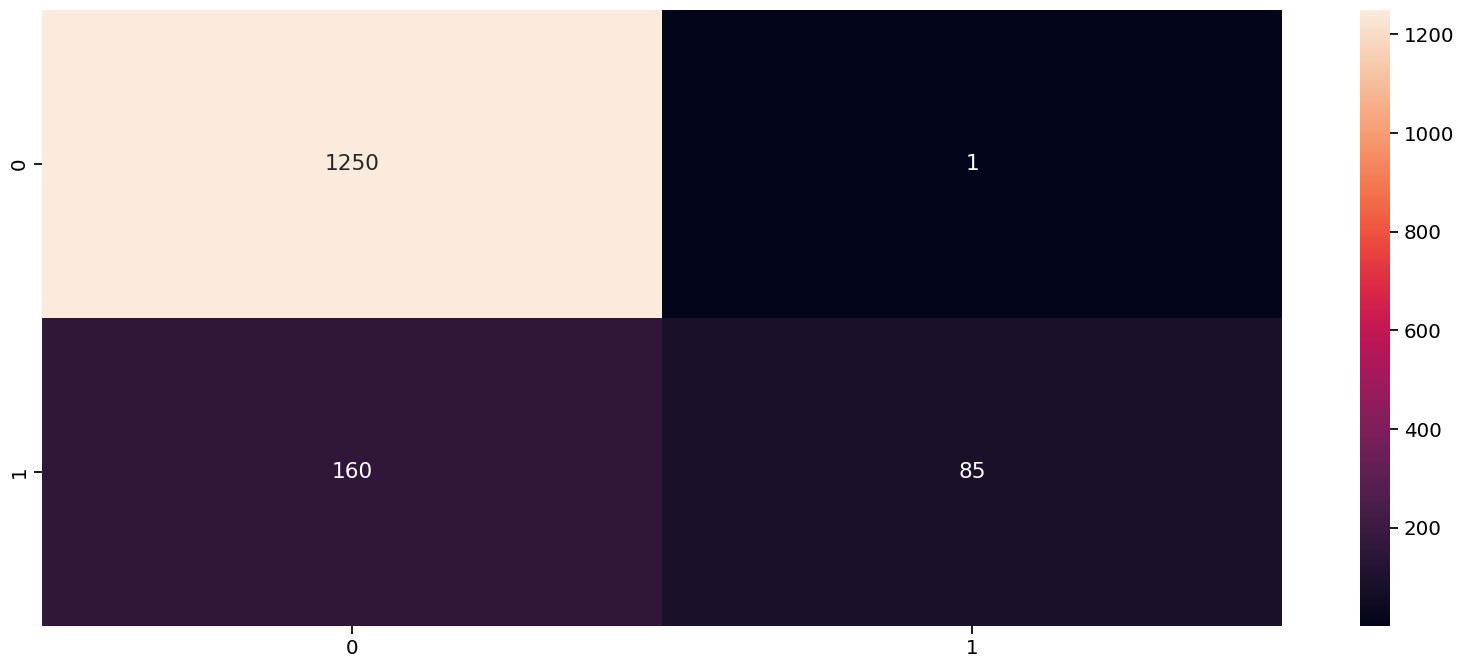

>> KNN
Accuracy: 0.856951871657754
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92      1251
         1.0       0.79      0.17      0.28       245

    accuracy                           0.86      1496
   macro avg       0.83      0.58      0.60      1496
weighted avg       0.85      0.86      0.82      1496



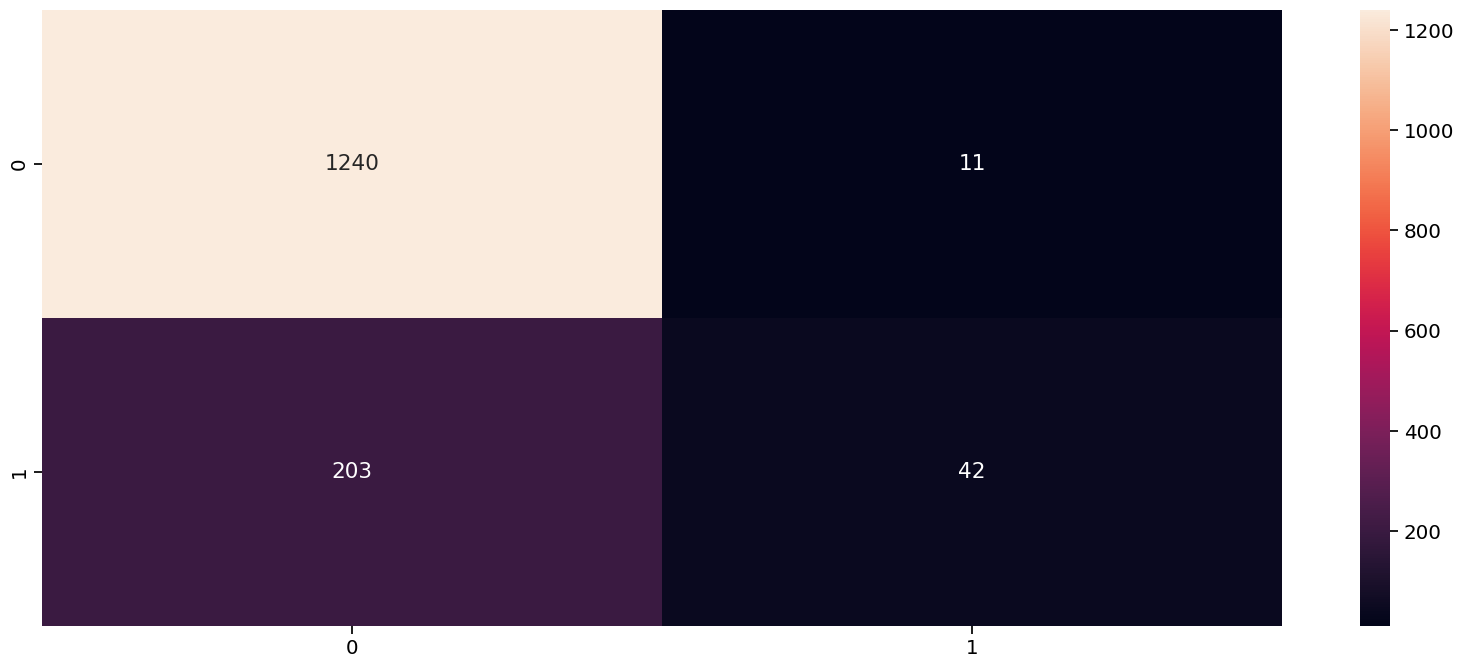

>> RF
Accuracy: 0.9298128342245989
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96      1251
         1.0       0.97      0.59      0.73       245

    accuracy                           0.93      1496
   macro avg       0.95      0.79      0.85      1496
weighted avg       0.93      0.93      0.92      1496



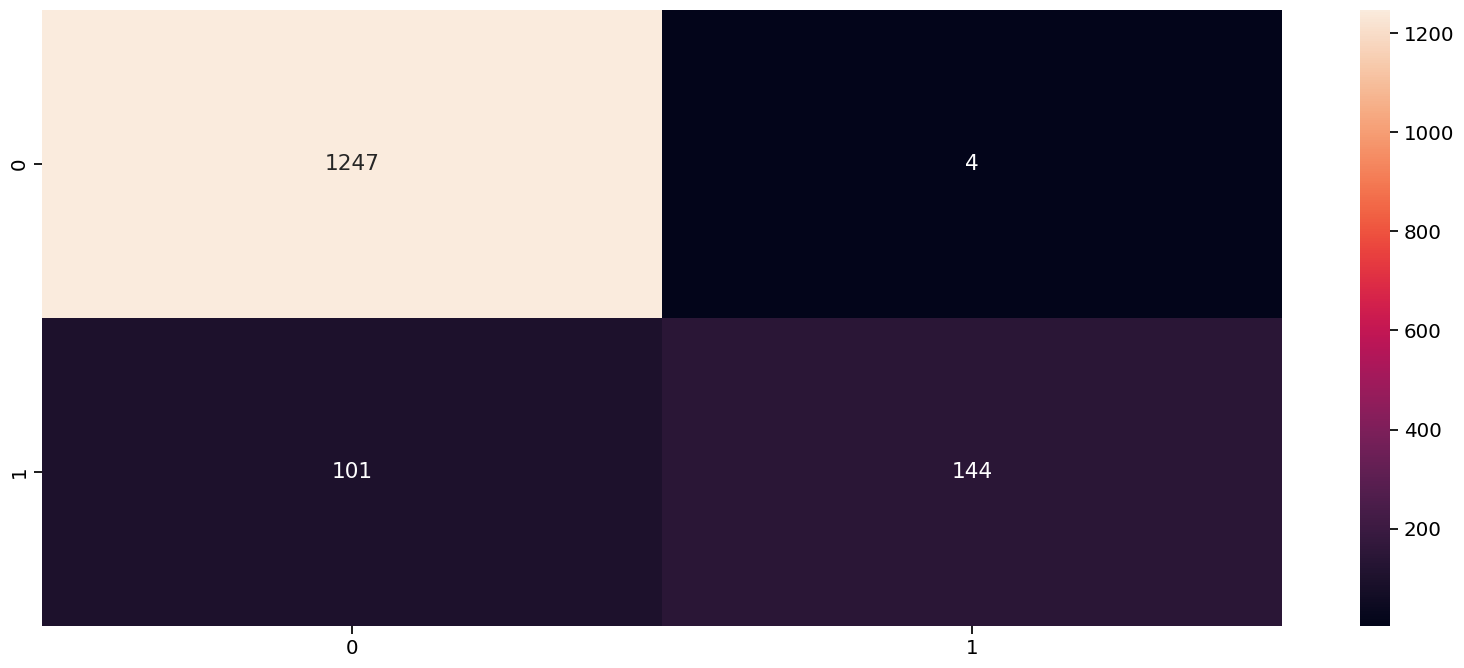

In [ ]:
models = [
    ('LR', LogisticRegression(class_weight='balanced', max_iter=400)), ('NB', MultinomialNB()),
    ('DT', DecisionTreeClassifier(class_weight='balanced')), ('SVM', SVC(class_weight='balanced')),
    ('Ada', AdaBoostClassifier()), ('KNN', KNeighborsClassifier()),
    ('RF', RandomForestClassifier(class_weight='balanced'))
]
for name, m in models:
    print(">>", name)
    m.fit(X_train, y_train)
    perf(m)

## Voting Classifier

>> Voting
Accuracy: 0.9491978609625669
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      1251
         1.0       0.98      0.70      0.82       245

    accuracy                           0.95      1496
   macro avg       0.96      0.85      0.89      1496
weighted avg       0.95      0.95      0.95      1496



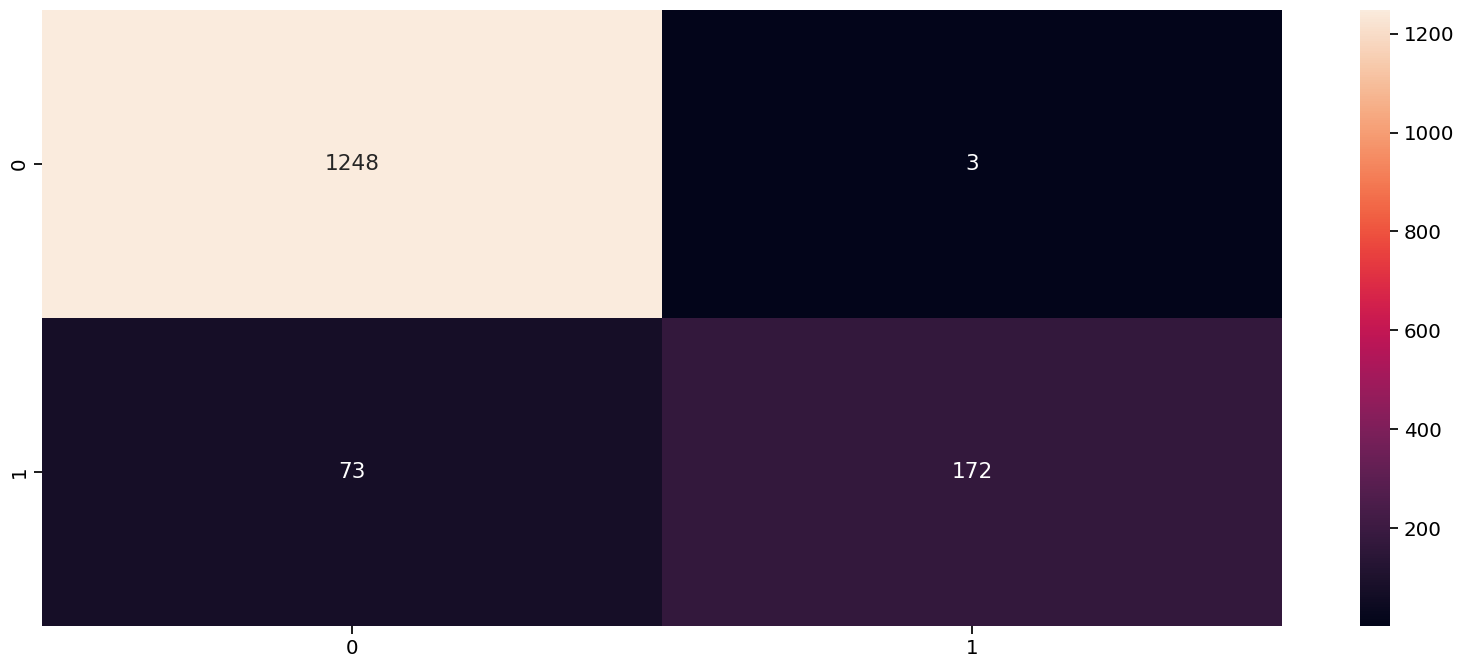

In [ ]:
voting = VotingClassifier(models, voting='hard')
voting.fit(X_train, y_train)
print(">> Voting")
perf(voting)

# Comparison of classical ML models -- without sampling

In [ ]:
# prompt: Compare the ml models

import pandas as pd
import matplotlib.pyplot as plt
results = []
for name, m in models:
    m.fit(X_train, y_train)
    preds = m.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    results.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1})

results_df = pd.DataFrame(results)

# Compare Voting Classifier with others
voting_preds = voting.predict(X_test)
voting_accuracy = accuracy_score(y_test, voting_preds)
voting_precision = precision_score(y_test, voting_preds)
voting_recall = recall_score(y_test, voting_preds)
voting_f1 = f1_score(y_test, voting_preds)

voting_result = {'Model': 'Voting', 'Accuracy': voting_accuracy, 'Precision': voting_precision, 'Recall': voting_recall, 'F1 Score': voting_f1}
results_df = pd.concat([results_df, pd.DataFrame([voting_result])], ignore_index=True)

print("\nComparison of Classical ML Models, including Voting Classifier:")
print(results_df.sort_values(by='F1 Score', ascending=False))



Comparison of Classical ML Models, including Voting Classifier:
    Model  Accuracy  Precision    Recall  F1 Score
0      LR  0.969920   0.920168  0.893878  0.906832
7  Voting  0.949198   0.982857  0.702041  0.819048
1      NB  0.928476   0.730000  0.893878  0.803670
3     SVM  0.941845   0.959302  0.673469  0.791367
2      DT  0.927807   0.772908  0.791837  0.782258
6      RF  0.932487   0.986486  0.595918  0.743003
4     Ada  0.892380   0.988372  0.346939  0.513595
5     KNN  0.856952   0.792453  0.171429  0.281879


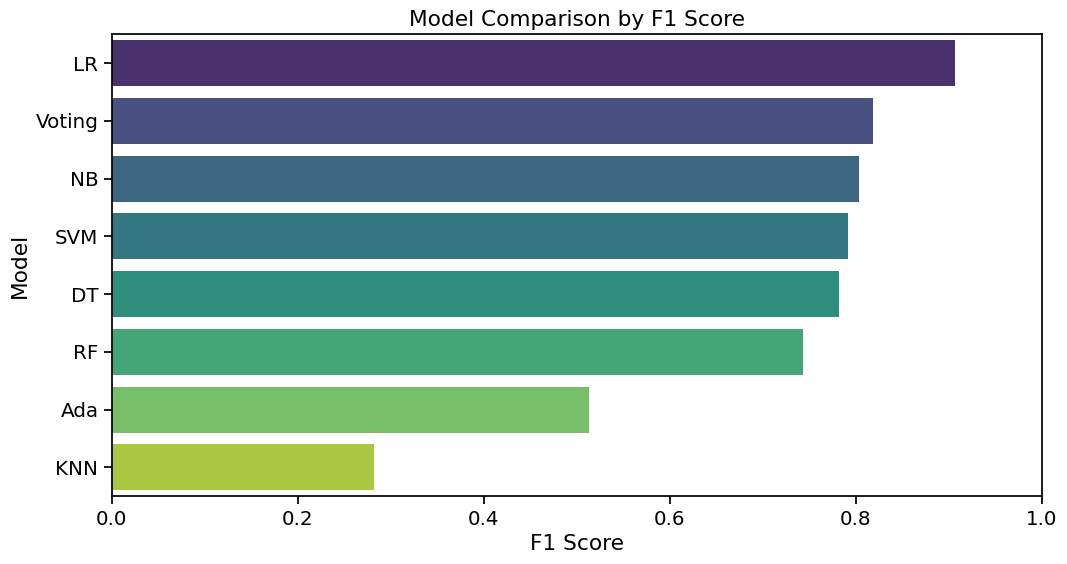

In [ ]:
# Visualize the comparison
plt.figure(figsize=(12, 6))
sns.barplot(x='F1 Score', y='Model', data=results_df.sort_values(by='F1 Score', ascending=False), palette='viridis')
plt.title('Model Comparison by F1 Score')
plt.xlabel('F1 Score')
plt.ylabel('Model')
plt.xlim(0, 1)
plt.show()


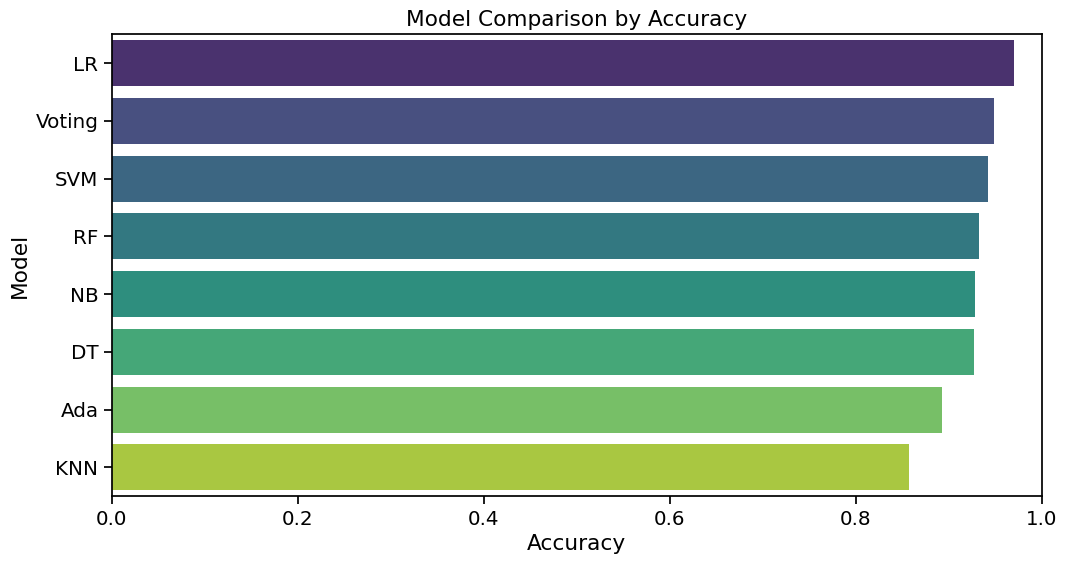

In [ ]:

plt.figure(figsize=(12, 6))
sns.barplot(x='Accuracy', y='Model', data=results_df.sort_values(by='Accuracy', ascending=False), palette='viridis')
plt.title('Model Comparison by Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.xlim(0, 1)
plt.show()

# Save the best classical ml model

We save the best model before applying SMOTE, as result of SMOTE is not satisfactory at all.

In [ ]:
import joblib

# Find the model with the highest F1 Score
best_model_row = results_df.loc[results_df['F1 Score'].idxmax()]
best_model_name = best_model_row['Model']

if best_model_name == 'Voting':
  best_model = voting
else:
  for name, m in models:
    if name == best_model_name:
      best_model = m
      break

# Save the best model
joblib.dump(best_model, f'{best_model_name}_best_model.pkl')

print(f"\nBest model saved: {best_model_name}_best_model.pkl")


Best model saved: LR_best_model.pkl


Best Classical model is Logistic Regression with 97% Accuracy and 90.7% F1 score

# SMOTE

Original dataset shape Counter({0.0: 5001, 1.0: 979})
Resampled dataset shape Counter({0.0: 5001, 1.0: 5001})
>> LR (with SMOTE)
Accuracy: 0.8663101604278075
              precision    recall  f1-score   support

         0.0       0.97      0.87      0.92      1251
         1.0       0.56      0.86      0.68       245

    accuracy                           0.87      1496
   macro avg       0.76      0.86      0.80      1496
weighted avg       0.90      0.87      0.88      1496



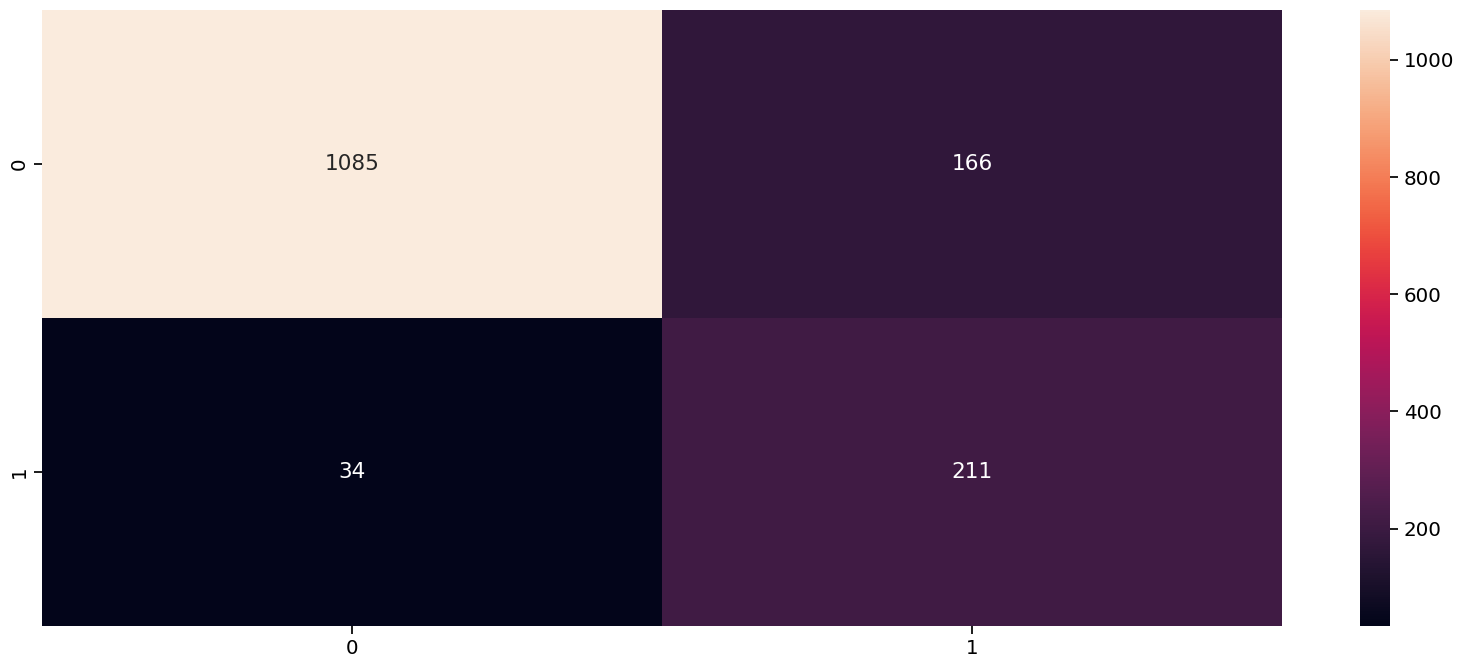

>> NB (with SMOTE)
Accuracy: 0.8776737967914439
              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92      1251
         1.0       0.58      0.95      0.72       245

    accuracy                           0.88      1496
   macro avg       0.78      0.91      0.82      1496
weighted avg       0.92      0.88      0.89      1496



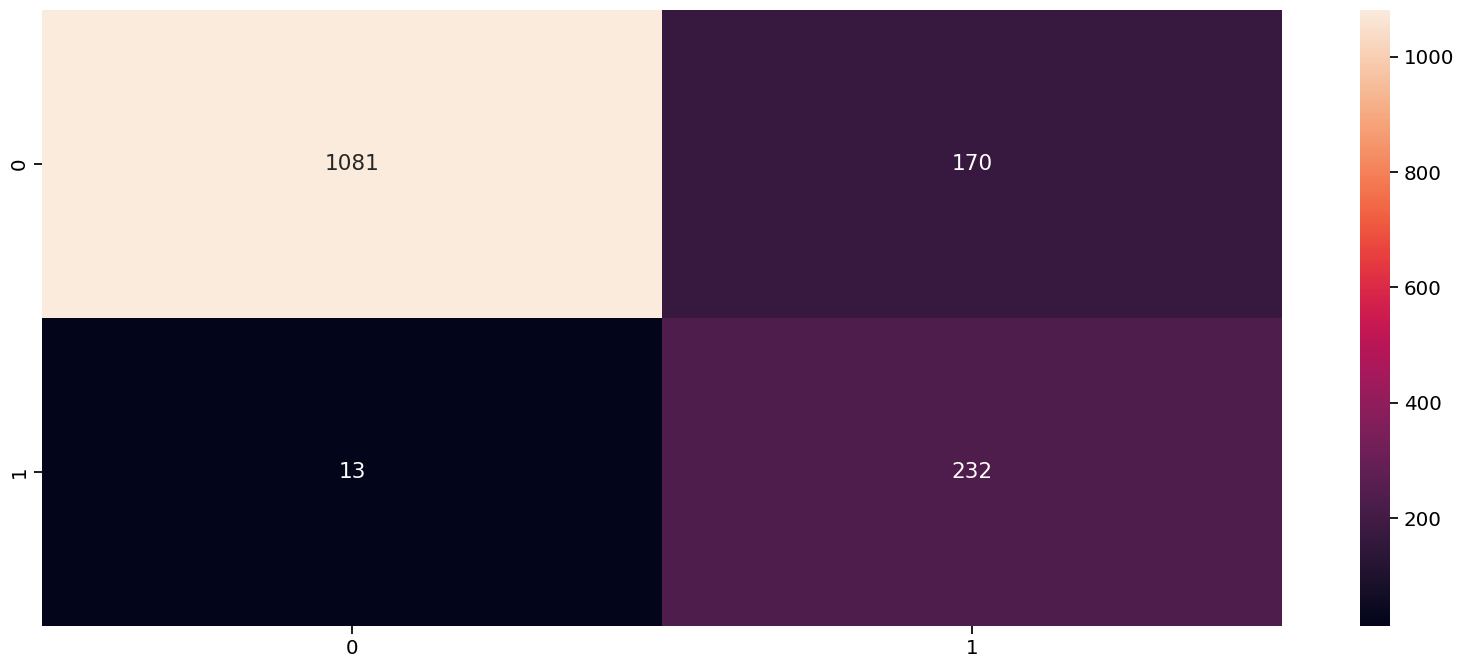

>> DT (with SMOTE)
Accuracy: 0.7252673796791443
              precision    recall  f1-score   support

         0.0       0.96      0.70      0.81      1251
         1.0       0.36      0.83      0.50       245

    accuracy                           0.73      1496
   macro avg       0.66      0.77      0.65      1496
weighted avg       0.86      0.73      0.76      1496



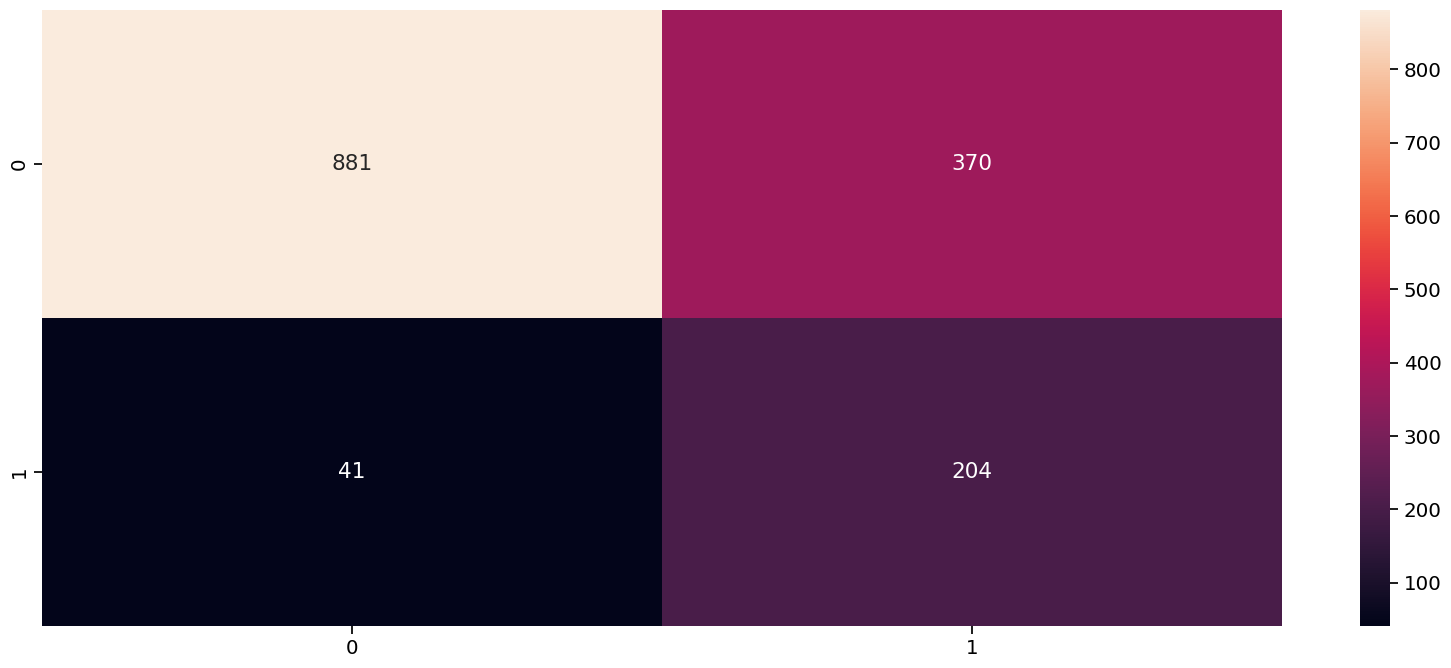

>> SVM (with SMOTE)
Accuracy: 0.8088235294117647
              precision    recall  f1-score   support

         0.0       0.90      0.87      0.88      1251
         1.0       0.43      0.51      0.46       245

    accuracy                           0.81      1496
   macro avg       0.66      0.69      0.67      1496
weighted avg       0.82      0.81      0.81      1496



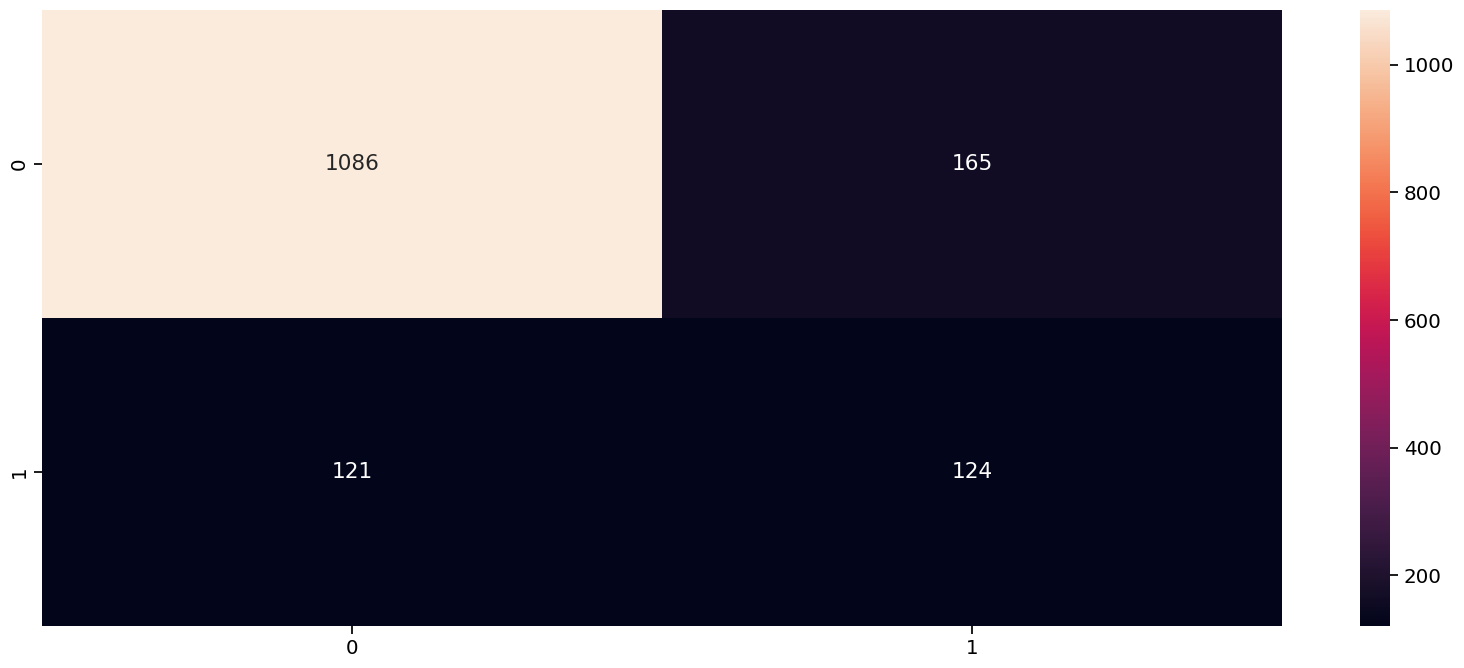

>> Ada (with SMOTE)
Accuracy: 0.9117647058823529
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      1251
         1.0       0.99      0.47      0.63       245

    accuracy                           0.91      1496
   macro avg       0.95      0.73      0.79      1496
weighted avg       0.92      0.91      0.90      1496



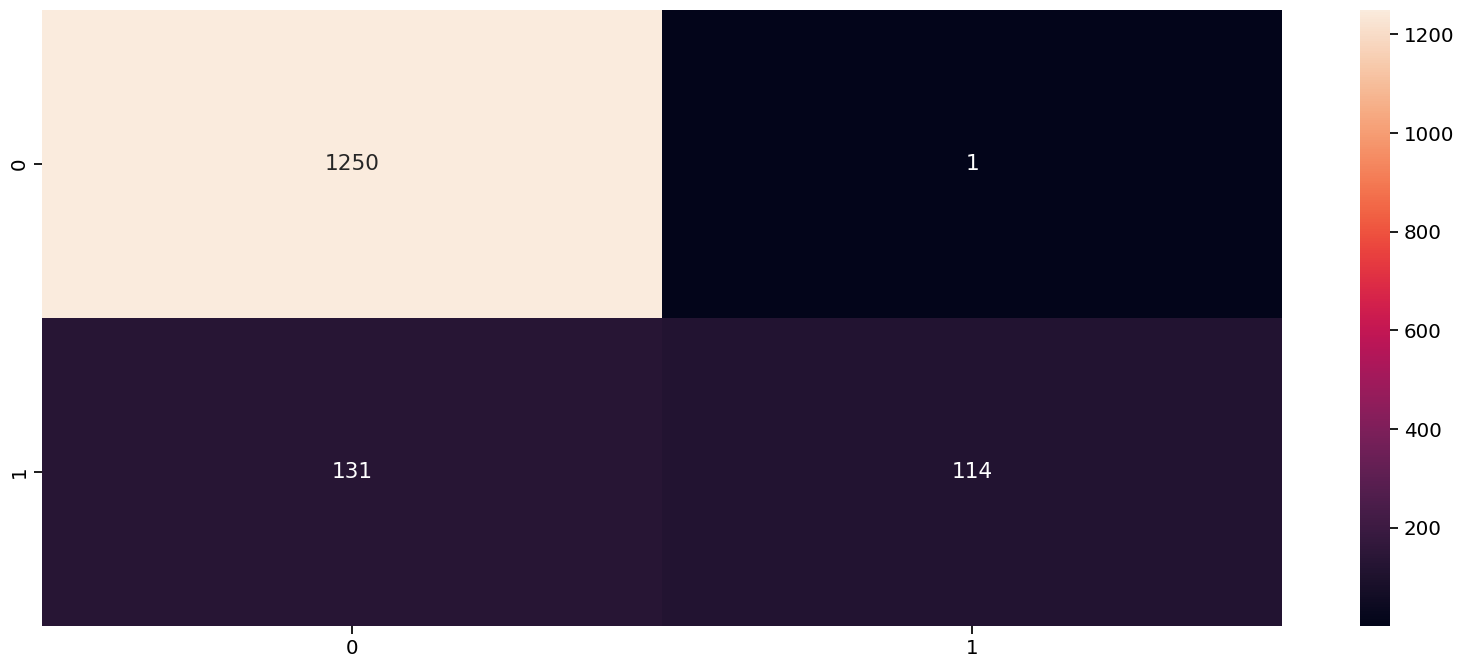

>> KNN (with SMOTE)
Accuracy: 0.27072192513368987
              precision    recall  f1-score   support

         0.0       0.96      0.13      0.23      1251
         1.0       0.18      0.97      0.30       245

    accuracy                           0.27      1496
   macro avg       0.57      0.55      0.27      1496
weighted avg       0.83      0.27      0.25      1496



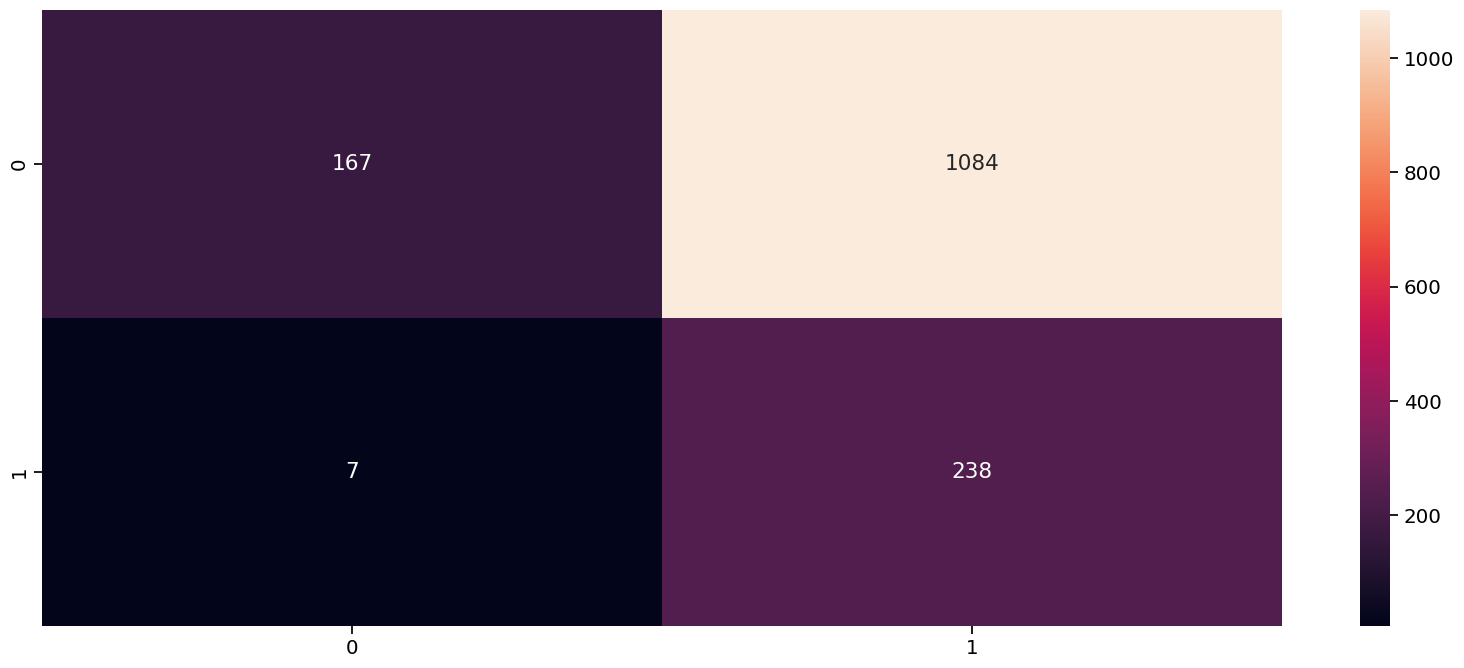

>> RF (with SMOTE)
Accuracy: 0.7847593582887701
              precision    recall  f1-score   support

         0.0       0.94      0.80      0.86      1251
         1.0       0.41      0.72      0.52       245

    accuracy                           0.78      1496
   macro avg       0.67      0.76      0.69      1496
weighted avg       0.85      0.78      0.81      1496



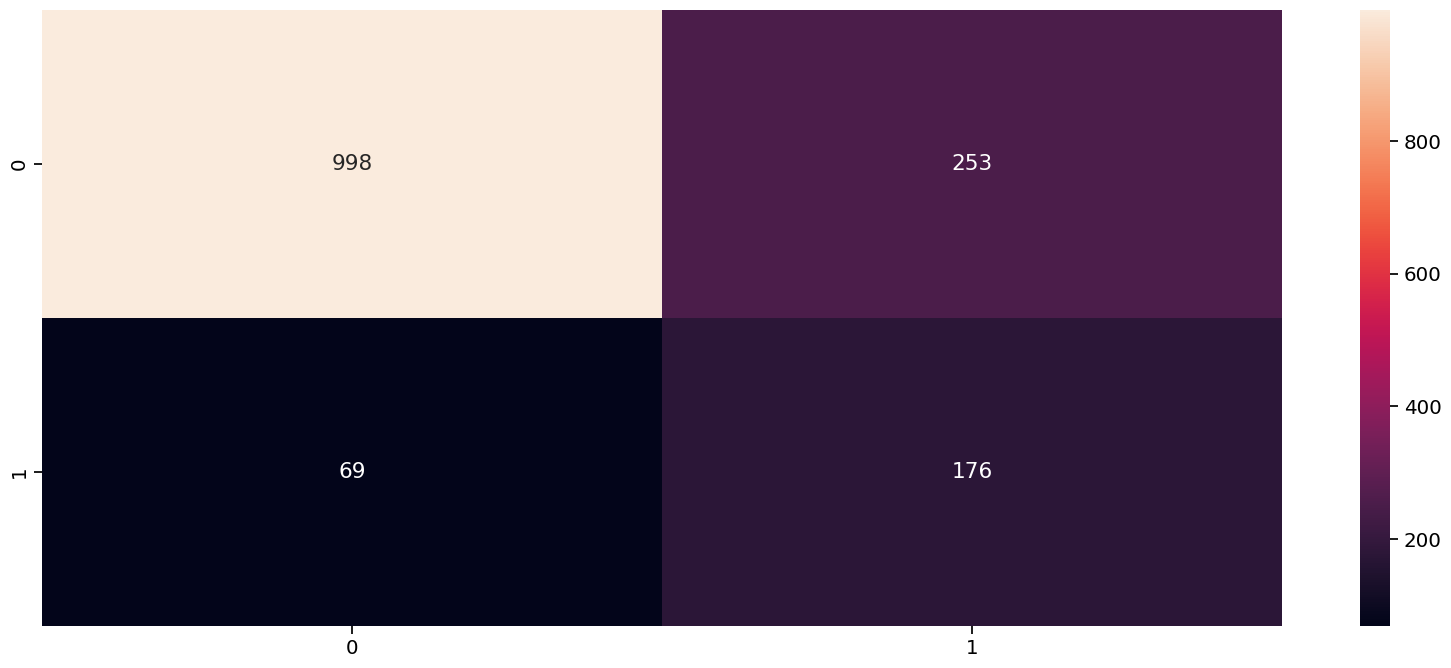

In [ ]:
# Handle imbalanced data- label 0: 6252 and label 1: 1224

from imblearn.over_sampling import SMOTE
from collections import Counter

print(f"Original dataset shape {Counter(y_train)}")

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print(f"Resampled dataset shape {Counter(y_train_res)}")

# Now you can use X_train_res and y_train_res for training your models
# For example, re-train the models defined earlier
for name, m in models:
    print(">>", name, "(with SMOTE)")
    m.fit(X_train_res, y_train_res)
    perf(m)


>> Voting (with SMOTE)
Accuracy: 0.858957219251337
              precision    recall  f1-score   support

         0.0       0.97      0.86      0.91      1251
         1.0       0.54      0.84      0.66       245

    accuracy                           0.86      1496
   macro avg       0.76      0.85      0.79      1496
weighted avg       0.90      0.86      0.87      1496



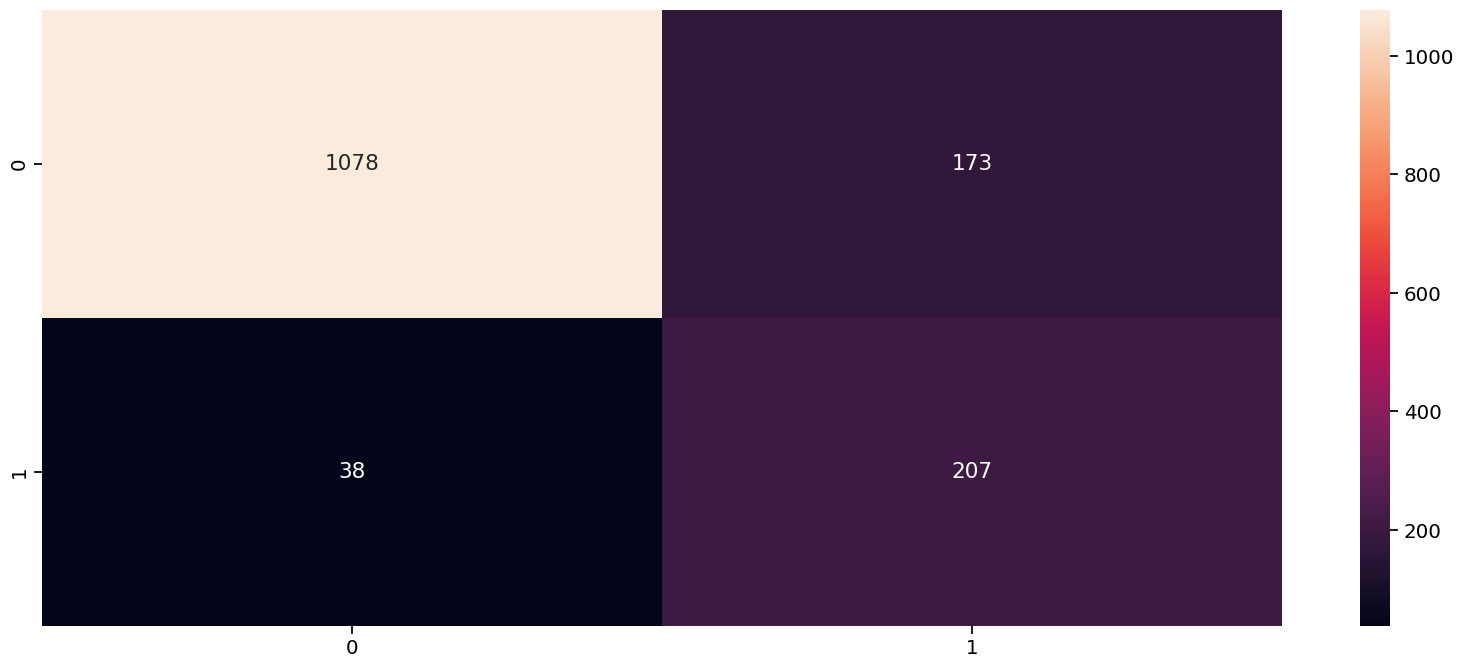

In [ ]:
print(">> Voting (with SMOTE)")
voting_res = VotingClassifier(models, voting='hard') # Re-initialize voting classifier with resampled data
voting_res.fit(X_train_res, y_train_res)
perf(voting_res)


## Comparison of classical ML models -- with sampling

In [ ]:
# Compare the ml models now, after appling smote

import pandas as pd
import matplotlib.pyplot as plt
# Comparison of best classical ML models -- with SMOTE

results_smote = []
for name, m in models:
    # Models were already trained on resampled data in the previous step
    preds = m.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    results_smote.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1})

results_smote_df = pd.DataFrame(results_smote)


In [ ]:
print("\nComparison of Classical ML Models (after SMOTE):")
print(results_smote_df.sort_values(by='F1 Score', ascending=False))

# Compare Voting Classifier with others (with SMOTE)
voting_res_preds = voting_res.predict(X_test)
voting_res_accuracy = accuracy_score(y_test, voting_res_preds)
voting_res_precision = precision_score(y_test, voting_res_preds)
voting_res_recall = recall_score(y_test, voting_res_preds)
voting_res_f1 = f1_score(y_test, voting_res_preds)

voting_res_result = {'Model': 'Voting (SMOTE)', 'Accuracy': voting_res_accuracy, 'Precision': voting_res_precision, 'Recall': voting_res_recall, 'F1 Score': voting_res_f1}
results_smote_df = pd.concat([results_smote_df, pd.DataFrame([voting_res_result])], ignore_index=True)

print("\nComparison including Voting Classifier (after SMOTE):")
print(results_smote_df.sort_values(by='F1 Score', ascending=False))



Comparison of Classical ML Models (after SMOTE):
  Model  Accuracy  Precision    Recall  F1 Score
1    NB  0.877674   0.577114  0.946939  0.717156
0    LR  0.866310   0.559682  0.861224  0.678457
4   Ada  0.911765   0.991304  0.465306  0.633333
6    RF  0.784759   0.410256  0.718367  0.522255
2    DT  0.725267   0.355401  0.832653  0.498168
3   SVM  0.808824   0.429066  0.506122  0.464419
5   KNN  0.270722   0.180030  0.971429  0.303765

Comparison including Voting Classifier (after SMOTE):
            Model  Accuracy  Precision    Recall  F1 Score
1              NB  0.877674   0.577114  0.946939  0.717156
0              LR  0.866310   0.559682  0.861224  0.678457
7  Voting (SMOTE)  0.858957   0.544737  0.844898  0.662400
4             Ada  0.911765   0.991304  0.465306  0.633333
6              RF  0.784759   0.410256  0.718367  0.522255
2              DT  0.725267   0.355401  0.832653  0.498168
3             SVM  0.808824   0.429066  0.506122  0.464419
5             KNN  0.270722   0

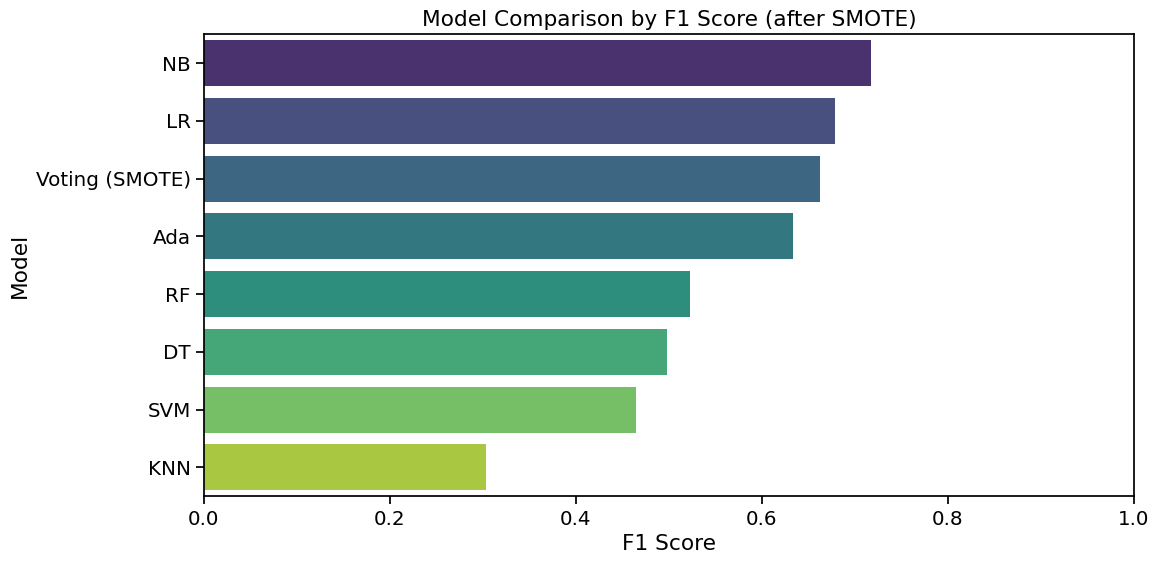

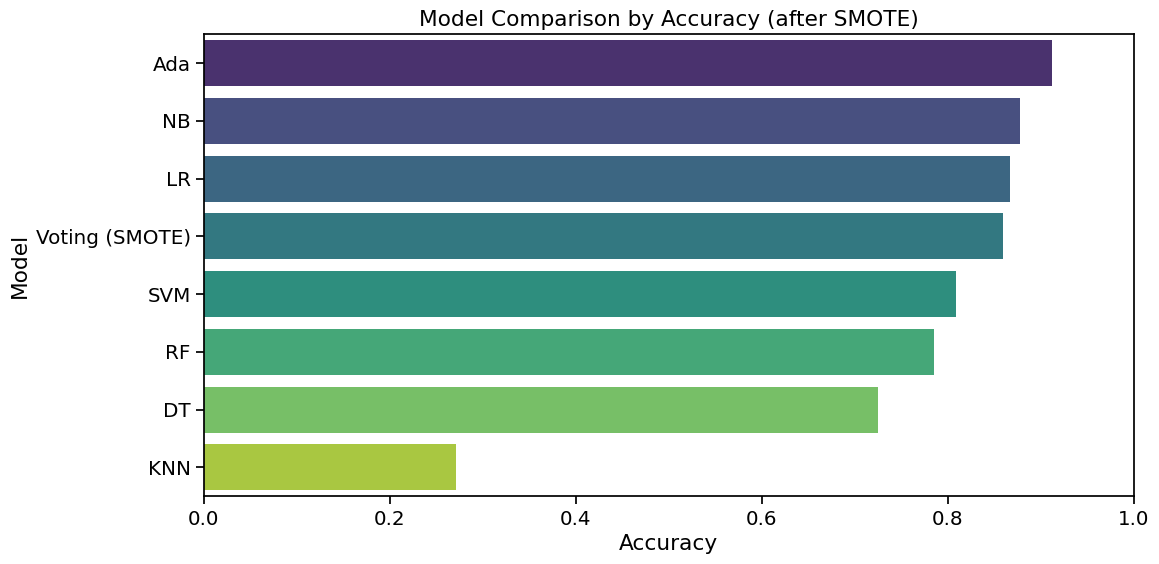

In [ ]:
# Visualize the comparison after SMOTE
plt.figure(figsize=(12, 6))
sns.barplot(x='F1 Score', y='Model', data=results_smote_df.sort_values(by='F1 Score', ascending=False), palette='viridis')
plt.title('Model Comparison by F1 Score (after SMOTE)')
plt.xlabel('F1 Score')
plt.ylabel('Model')
plt.xlim(0, 1)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Accuracy', y='Model', data=results_smote_df.sort_values(by='Accuracy', ascending=False), palette='viridis')
plt.title('Model Comparison by Accuracy (after SMOTE)')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.xlim(0, 1)
plt.show()


In [ ]:
# Compare results before and after SMOTE side-by-side

import matplotlib.pyplot as plt
# Optional: Compare results before and after SMOTE side-by-side
print("\nComparison Before and After SMOTE (F1 Score):")
comparison_f1 = results_df.set_index('Model')['F1 Score'].rename('Before SMOTE').to_frame()
comparison_f1['After SMOTE'] = results_smote_df.set_index('Model')['F1 Score']
print(comparison_f1.dropna().sort_values(by='Before SMOTE', ascending=False))

print("\nComparison Before and After SMOTE (Accuracy):")
comparison_accuracy = results_df.set_index('Model')['Accuracy'].rename('Before SMOTE').to_frame()
comparison_accuracy['After SMOTE'] = results_smote_df.set_index('Model')['Accuracy']
print(comparison_accuracy.dropna().sort_values(by='Before SMOTE', ascending=False))



Comparison Before and After SMOTE (F1 Score):
       Before SMOTE  After SMOTE
Model                           
LR         0.895833     0.678457
NB         0.798493     0.717156
DT         0.779116     0.498168
SVM        0.762136     0.464419
RF         0.758105     0.522255
Ada        0.487654     0.633333
KNN        0.333333     0.303765

Comparison Before and After SMOTE (Accuracy):
       Before SMOTE  After SMOTE
Model                           
LR         0.966578     0.866310
RF         0.935160     0.784759
SVM        0.934492     0.808824
NB         0.928476     0.877674
DT         0.926471     0.725267
Ada        0.889037     0.911765
KNN        0.866310     0.270722


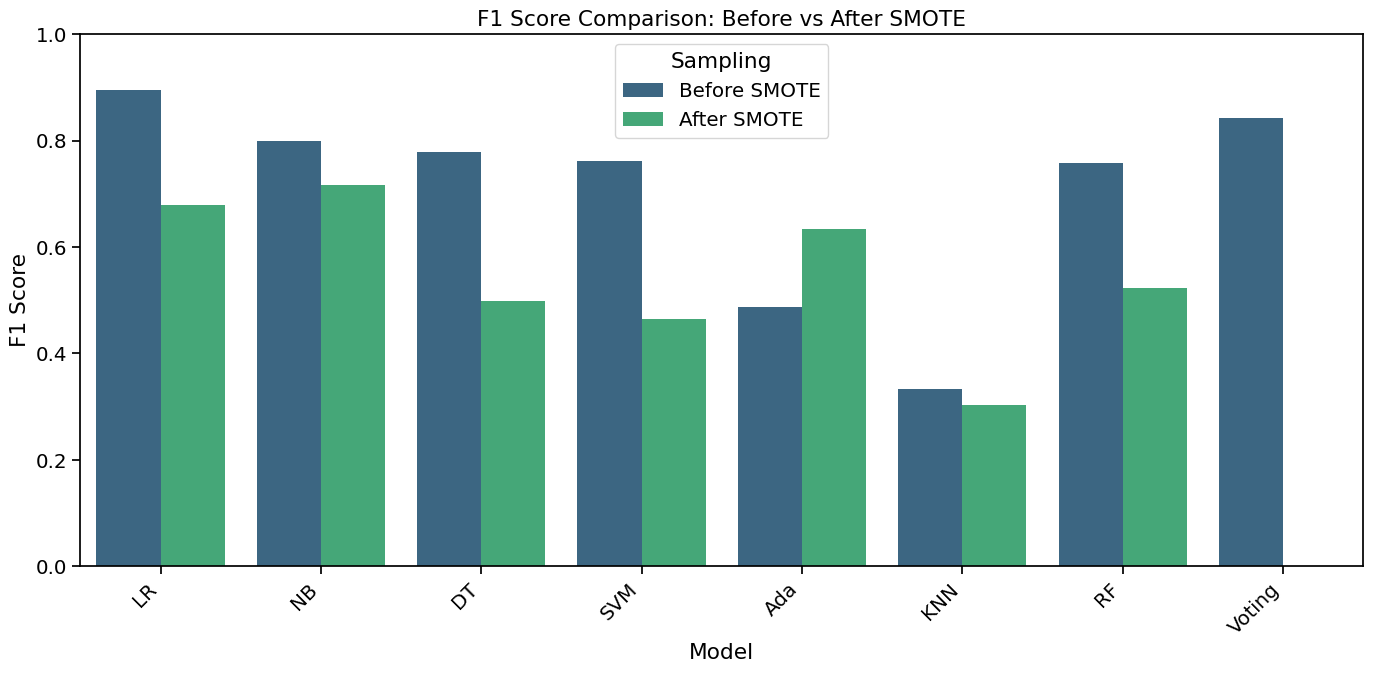

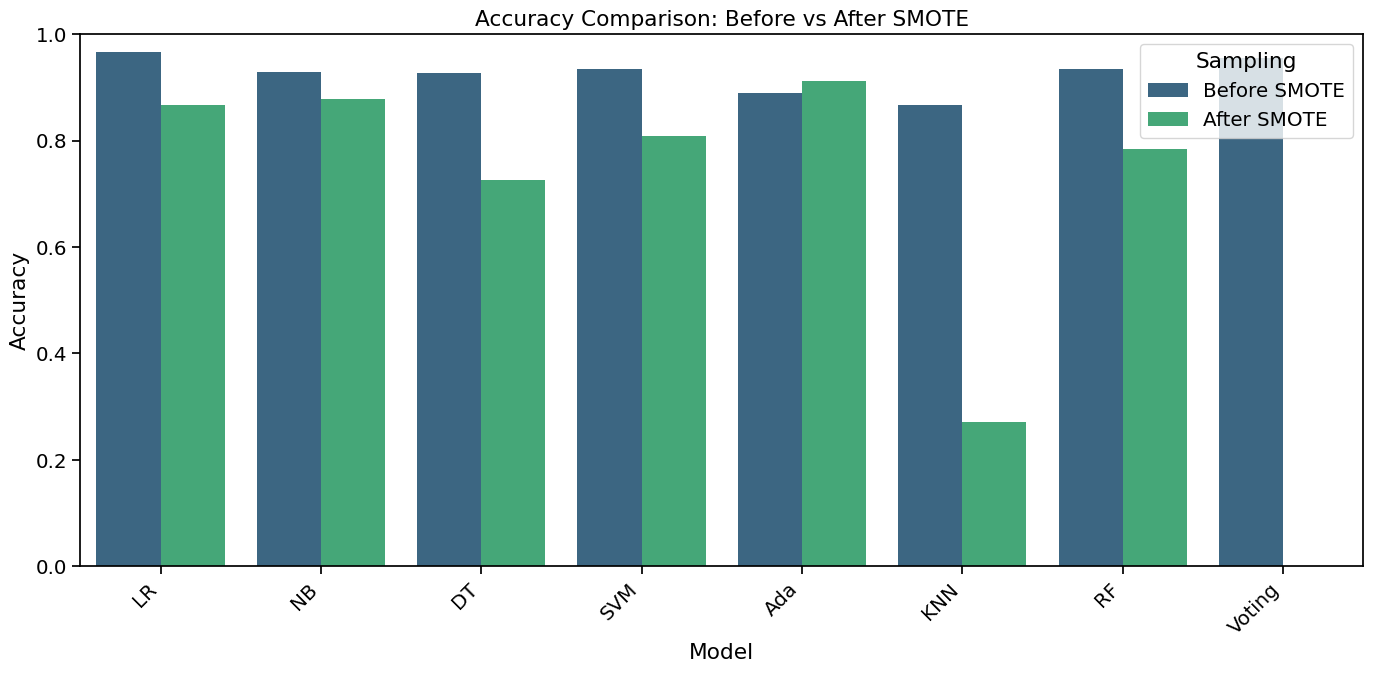

In [ ]:
# Visualize the side-by-side comparison for F1 Score
comparison_f1_melted = comparison_f1.reset_index().melt(id_vars='Model', var_name='Sampling', value_name='F1 Score')

plt.figure(figsize=(14, 7))
sns.barplot(x='Model', y='F1 Score', hue='Sampling', data=comparison_f1_melted, palette='viridis')
plt.title('F1 Score Comparison: Before vs After SMOTE')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize the side-by-side comparison for Accuracy
comparison_accuracy_melted = comparison_accuracy.reset_index().melt(id_vars='Model', var_name='Sampling', value_name='Accuracy')

plt.figure(figsize=(14, 7))
sns.barplot(x='Model', y='Accuracy', hue='Sampling', data=comparison_accuracy_melted, palette='viridis')
plt.title('Accuracy Comparison: Before vs After SMOTE')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


---

# DEEP LEARNING MODELS



# CNN 2

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 128)           2560000   
                                                                 
 conv1d (Conv1D)             (None, 47, 128)           65664     
                                                                 
 dropout (Dropout)           (None, 47, 128)           0         
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                        

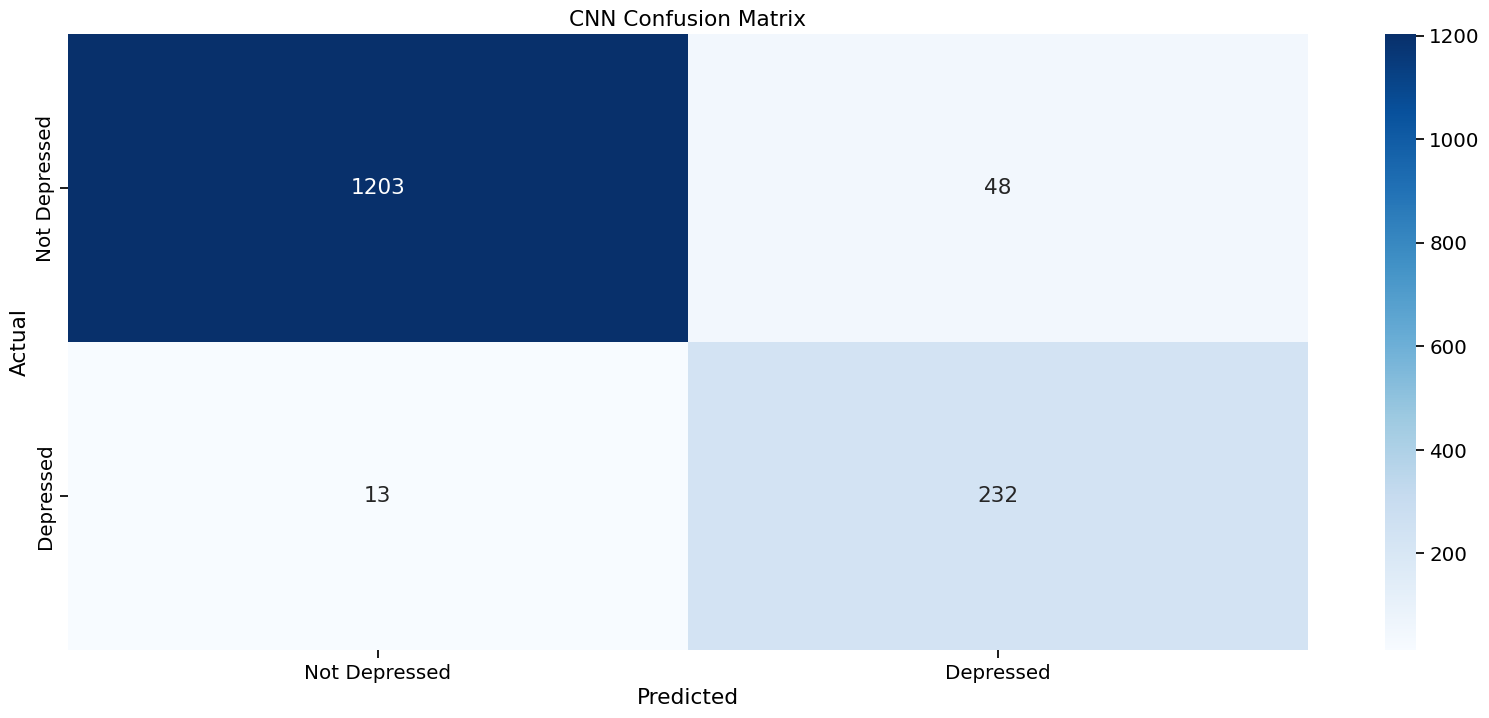

Precision: 0.8286
Recall:    0.9469
F1 Score:  0.8838


In [ ]:
# 1) PARAMETERS
MAX_VOCAB_SIZE      = 20000
MAX_SEQUENCE_LENGTH = 50     # reduced from 1000 to match your short texts
EMBEDDING_DIM       = 128

# 3) TOKENIZER & SEQUENCES
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(df['cleaned'])
seqs = tokenizer.texts_to_sequences(df['cleaned'])
data_padded = pad_sequences(seqs, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(
    data_padded, y, test_size=0.2, random_state=1, stratify=y
)

# 4) TRY LOADING WORD2VEC EMBEDDINGS
try:
    w2v = KeyedVectors.load_word2vec_format('/content/GoogleNews-w2v-128.bin', binary=True)
    word_index = tokenizer.word_index
    num_words  = min(MAX_VOCAB_SIZE, len(word_index) + 1)
    emb_matrix = np.zeros((num_words, EMBEDDING_DIM))
    for w, i in word_index.items():
        if i < MAX_VOCAB_SIZE and w in w2v:
            emb_matrix[i] = w2v[w]
    trainable_emb = False
except Exception:
    num_words     = MAX_VOCAB_SIZE
    emb_matrix    = None
    trainable_emb = True

# 5) CALLBACKS
def get_cbs(name):
    return [
        EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1),
        ModelCheckpoint(f'{name}_best.h5', monitor='val_loss', save_best_only=True)
    ]

# 6) BUILD THE CNN
cnn = Sequential([
    Embedding(
        input_dim=num_words,
        output_dim=EMBEDDING_DIM,
        input_length=MAX_SEQUENCE_LENGTH,
        weights=[emb_matrix] if emb_matrix is not None else None,
        trainable=trainable_emb
    ),
    Conv1D(128, kernel_size=4, activation='relu'),
    Dropout(0.5),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

cnn.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=1e-3),
    metrics=['accuracy']
)

print(cnn.summary())

# 7) COMPUTE CLASS WEIGHTS
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_seq),
    y=y_train_seq
)
class_weight_dict = dict(enumerate(class_weights))

# 8) TRAIN WITH CLASS WEIGHTS
history = cnn.fit(
    X_train_seq, y_train_seq,
    epochs=20,
    batch_size=64,
    validation_split=0.1,
    class_weight=class_weight_dict,
    callbacks=get_cbs('cnn'),
    verbose=1
)

# 9) EVALUATE
test_loss, test_acc = cnn.evaluate(X_test_seq, y_test_seq, verbose=0)
print(f"\n✅ CNN Test Accuracy: {test_acc:.4f}")

# 10) PREDICT & METRICS
y_pred_probs = cnn.predict(X_test_seq).flatten()
y_pred = (y_pred_probs > 0.5).astype(int)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

print("Classification Report:\n", classification_report(y_test_seq, y_pred))
cm = confusion_matrix(y_test_seq, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Depressed','Depressed'],
            yticklabels=['Not Depressed','Depressed'])
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.show()

print(f"Precision: {precision_score(y_test_seq, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test_seq, y_pred):.4f}")
print(f"F1 Score:  {f1_score(y_test_seq, y_pred):.4f}")


# BiLSTM 2

Epoch 1/20
85/85 [==============================] - 29s 279ms/step - loss: 0.6803 - accuracy: 0.5619 - val_loss: 0.5554 - val_accuracy: 0.8428 - lr: 0.0010
Epoch 2/20
85/85 [==============================] - 18s 206ms/step - loss: 0.3681 - accuracy: 0.8662 - val_loss: 0.2079 - val_accuracy: 0.9247 - lr: 0.0010
Epoch 3/20
85/85 [==============================] - 16s 190ms/step - loss: 0.1238 - accuracy: 0.9706 - val_loss: 0.1820 - val_accuracy: 0.9281 - lr: 0.0010
Epoch 4/20
85/85 [==============================] - 15s 179ms/step - loss: 0.0598 - accuracy: 0.9827 - val_loss: 0.1642 - val_accuracy: 0.9515 - lr: 0.0010
Epoch 5/20
85/85 [==============================] - 16s 188ms/step - loss: 0.0500 - accuracy: 0.9863 - val_loss: 0.2025 - val_accuracy: 0.9515 - lr: 0.0010
Epoch 6/20
85/85 [==============================] - ETA: 0s - loss: 0.0357 - accuracy: 0.9922
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
85/85 [==============================] - 16s 185ms

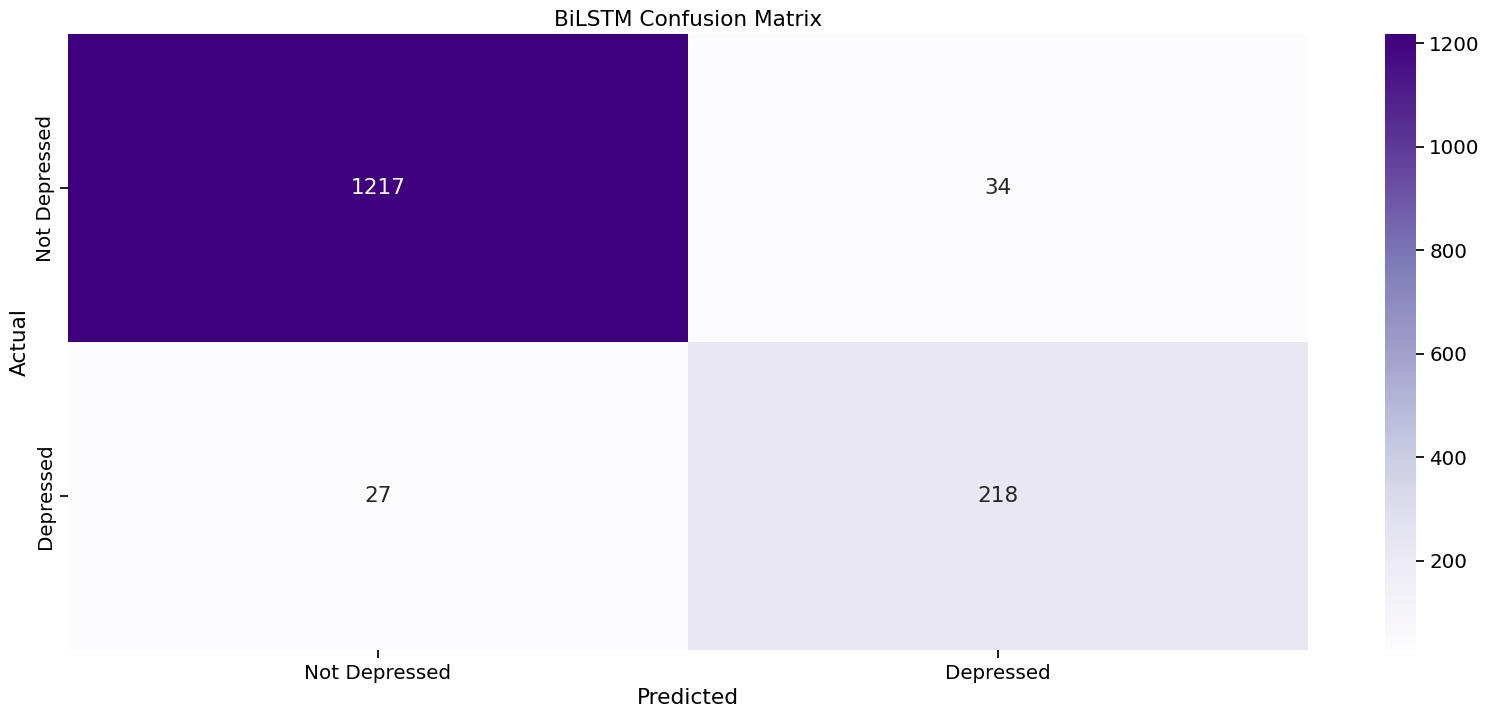

Precision: 0.8651
Recall:    0.8898
F1 Score:  0.8773


In [ ]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import re

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

from gensim.models import KeyedVectors

# 1) PARAMETERS
MAX_VOCAB_SIZE = 20000
MAX_SEQUENCE_LENGTH = 50  # based on avg length = ~14
EMBEDDING_DIM = 128

# 3) TOKENIZATION
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(df['cleaned'])
seqs = tokenizer.texts_to_sequences(df['cleaned'])
data_padded = pad_sequences(seqs, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(
    data_padded, y, test_size=0.2, stratify=y, random_state=42
)

# 4) WORD2VEC EMBEDDING (optional)
try:
    w2v = KeyedVectors.load_word2vec_format('/content/GoogleNews-w2v-128.bin', binary=True)
    word_index = tokenizer.word_index
    num_words = min(MAX_VOCAB_SIZE, len(word_index) + 1)
    emb_matrix = np.zeros((num_words, EMBEDDING_DIM))
    for word, i in word_index.items():
        if i < MAX_VOCAB_SIZE and word in w2v:
            emb_matrix[i] = w2v[word]
    trainable_emb = False
except Exception:
    num_words = MAX_VOCAB_SIZE
    emb_matrix = None
    trainable_emb = True

# 5) CALLBACKS
def get_cbs(name):
    return [
        EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1),
        ModelCheckpoint(f'{name}_best.h5', monitor='val_loss', save_best_only=True)
    ]

# 6) CLASS WEIGHTS
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_seq),
    y=y_train_seq
)
class_weight_dict = dict(enumerate(class_weights))

# 7) BiLSTM MODEL
bilstm = Sequential([
    Embedding(
        input_dim=num_words,
        output_dim=EMBEDDING_DIM,
        input_length=MAX_SEQUENCE_LENGTH,
        weights=[emb_matrix] if emb_matrix is not None else None,
        trainable=trainable_emb
    ),
    Bidirectional(LSTM(64)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

bilstm.compile(loss='binary_crossentropy', optimizer=Adam(1e-3), metrics=['accuracy'])

# 8) TRAIN
history = bilstm.fit(
    X_train_seq, y_train_seq,
    epochs=20,
    batch_size=64,
    validation_split=0.1,
    callbacks=get_cbs('bilstm'),
    class_weight=class_weight_dict,
    verbose=1
)

# 9) EVALUATE
loss, acc = bilstm.evaluate(X_test_seq, y_test_seq, verbose=0)
print(f"\n✅ BiLSTM Test Accuracy: {acc:.4f}")
print(bilstm.summary())

# 10) PREDICTIONS & REPORT
y_pred_probs = bilstm.predict(X_test_seq).flatten()
y_pred = (y_pred_probs > 0.5).astype(int)

print("Classification Report:\n", classification_report(y_test_seq, y_pred))

cm = confusion_matrix(y_test_seq, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Not Depressed', 'Depressed'],
            yticklabels=['Not Depressed', 'Depressed'])
plt.title("BiLSTM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(f"Precision: {precision_score(y_test_seq, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test_seq, y_pred):.4f}")
print(f"F1 Score:  {f1_score(y_test_seq, y_pred):.4f}")


# Distil BERT

In [ ]:
# In Colab or your shell:
!pip install -U transformers accelerate datasets nlpaug scikit-learn tensorflow_addons

  Using cached accelerate-1.7.0-py3-none-any.whl.metadata (19 kB)
  Using cached datasets-3.6.0-py3-none-any.whl.metadata (19 kB)
  Using cached tensorflow_addons-0.23.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.8 kB)
Using cached accelerate-1.7.0-py3-none-any.whl (362 kB)
Using cached datasets-3.6.0-py3-none-any.whl (491 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 61.3 MB/s eta 0:00:00
Using cached tensorflow_addons-0.23.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (611 kB)
  Attempting uninstall: tensorflow_addons
    Found existing installation: tensorflow-addons 0.20.0
    Uninstalling tensorflow-addons-0.20.0:
      Successfully uninstalled tensorflow-addons-0.20.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.11.0
 

In [ ]:
import numpy as np
import pandas as pd
import nlpaug.augmenter.word as naw
# tensorflow_addons is not needed if using only torch for metrics and loss
# import tensorflow_addons as tfa
from sklearn.model_selection import train_test_split
from transformers import (
    DistilBertTokenizerFast,
    DistilBertForSequenceClassification,
    DataCollatorWithPadding,
    Trainer,
    TrainingArguments
)
from datasets import Dataset
from sklearn.utils import class_weight
import torch # Import torch

# Repeat steps due to session restart
# df = pd.read_excel('/content/Depression_Text.xlsx')
# df.dropna(axis = 0, inplace = True)
# df = df.sample(frac = 1)

df['label'] = df['label'].astype(int)

import nltk

try:
    nltk.data.find('taggers/averaged_perceptron_tagger_eng.zip')
    print("NLTK resource 'averaged_perceptron_tagger_eng' is already downloaded.")
except LookupError:
    nltk.download('averaged_perceptron_tagger_eng')
    print("NLTK resource 'averaged_perceptron_tagger_eng' downloaded.")

# Define EDA synonym augmenter
eda_aug = naw.SynonymAug(aug_src='wordnet', aug_max=2)

# Extract minority examples
minority_df = df[df.label == 1]
aug_texts = minority_df['cleaned'].tolist()
augmented = eda_aug.augment(aug_texts)

# Combine original & augmented
aug_df = pd.DataFrame({
    'cleaned': augmented,
    'label': [1]*len(augmented)
})
df_aug = pd.concat([df, aug_df], ignore_index=True).sample(frac=1, random_state=42)

train_df, test_df = train_test_split(
    df_aug, test_size=0.2, stratify=df_aug.label, random_state=42
)

# Convert to HuggingFace Dataset
train_ds = Dataset.from_pandas(train_df)
test_ds  = Dataset.from_pandas(test_df)

tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

def tokenize_fn(batch):
    return tokenizer(
        batch['cleaned'],
        truncation=True,
        padding='max_length',
        max_length=32
    )

train_ds = train_ds.map(tokenize_fn, batched=True)
test_ds  = test_ds.map(tokenize_fn,  batched=True)

train_ds.set_format('torch', columns=['input_ids','attention_mask','label'])
test_ds.set_format('torch',  columns=['input_ids','attention_mask','label'])

labels = train_df['label'].values
weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(labels),
    y=labels
)
class_weights = {i: w for i, w in enumerate(weights)}

# For both train and test datasets, convert labels to float
# This is necessary for BCEWithLogitsLoss
train_dataset = train_ds.map(lambda e: {"labels": float(e["label"])})
test_dataset = test_ds.map(lambda e: {"labels": float(e["label"])})


# Based on: 6252 (negative) vs. 1224 (positive) before augmentation
# After augmentation, the counts will be different. Let's compute them on the augmented data.
aug_neg = df_aug['label'].value_counts()[0]
aug_pos = df_aug['label'].value_counts()[1]
pos_weight = torch.tensor([aug_neg / aug_pos]) # Calculate pos_weight based on augmented data

from torch import nn

class WeightedBCETrainer(Trainer):
    def __init__(self, pos_weight, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.pos_weight = pos_weight

    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        # Get labels before popping them
        labels = inputs.get("labels")
        # Remove labels from inputs so the model's internal loss is not computed
        if "labels" in inputs:
            inputs.pop("labels")

        # Pass inputs without labels to the model
        outputs = model(**inputs)
        logits = outputs.get("logits")

        # Ensure labels are float (required for BCEWithLogitsLoss)
        labels = labels.float()

        # Define weighted BCE loss
        # Move pos_weight to the same device as logits
        loss_fct = nn.BCEWithLogitsLoss(pos_weight=self.pos_weight.to(logits.device))

        # BCE expects logits and float labels
        loss = loss_fct(logits.view(-1), labels.view(-1))

        return (loss, outputs) if return_outputs else loss


model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=1, # Keep num_labels=1 for binary classification
    problem_type="single_label_classification" # Explicitly set problem type
)

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    # Ensure logits is a torch tensor if it's a numpy array from the model output
    if isinstance(logits, np.ndarray):
        logits = torch.tensor(logits)
    preds = (torch.sigmoid(logits) > 0.5).int().numpy()
    labels = labels.astype(int)
    return {
        "accuracy": accuracy_score(labels, preds),
        "f1": f1_score(labels, preds),
        "precision": precision_score(labels, preds),
        "recall": recall_score(labels, preds),
    }

training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    eval_strategy="epoch",
    save_strategy="epoch",
    logging_dir="./logs",
    logging_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    greater_is_better=True,
    save_total_limit=1,
    fp16=True # Keep mixed precision for speed
)

trainer = WeightedBCETrainer(
    pos_weight=pos_weight,
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator, # Include data_collator
    compute_metrics=compute_metrics
)

trainer.train()
metrics = trainer.evaluate()

print("✅ Final Evaluation Metrics:")
for k, v in metrics.items():
    print(f"{k}: {v:.4f}")


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


NLTK resource 'averaged_perceptron_tagger_eng' downloaded.


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

Map:   0%|          | 0/6960 [00:00<?, ? examples/s]

Map:   0%|          | 0/1740 [00:00<?, ? examples/s]

Map:   0%|          | 0/6960 [00:00<?, ? examples/s]

Map:   0%|          | 0/1740 [00:00<?, ? examples/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: aritra-bag (aritra_bag) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.341400,0.253061,0.950000,0.912563,0.899010,0.926531
2,0.131400,0.191753,0.967816,0.942387,0.950207,0.934694
3,0.049700,0.194996,0.977011,0.958763,0.968750,0.948980


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.341400,0.253061,0.950000,0.912563,0.899010,0.926531
2,0.131400,0.191753,0.967816,0.942387,0.950207,0.934694
3,0.049700,0.194996,0.977011,0.958763,0.968750,0.948980
4,0.013400,0.239507,0.977011,0.958763,0.968750,0.948980
5,0.005700,0.207762,0.978161,0.961066,0.965021,0.957143


✅ Final Evaluation Metrics:
eval_loss: 0.2078
eval_accuracy: 0.9782
eval_f1: 0.9611
eval_precision: 0.9650
eval_recall: 0.9571
eval_runtime: 107.6678
eval_samples_per_second: 16.1610
eval_steps_per_second: 0.5110
epoch: 5.0000


In [ ]:
print("\n✅ Final Test Metrics:")
for k, v in metrics.items():
    print(f"{k.capitalize():>9}: {v:.4f}")


✅ Final Test Metrics:
Eval_loss: 0.2078
Eval_accuracy: 0.9782
  Eval_f1: 0.9611
Eval_precision: 0.9650
Eval_recall: 0.9571
Eval_runtime: 107.6678
Eval_samples_per_second: 16.1610
Eval_steps_per_second: 0.5110
    Epoch: 5.0000


In [ ]:
# zip every data present in ./content and save

import shutil

# Zip the entire results directory
shutil.make_archive('content_data_archive', 'zip', '/content')

print("Zipped all contents from /content into content_data_archive.zip")


In [ ]:
# Save the trained Distil BERT model
model_save_path = "./distilbert_best_model"
trainer.save_model(model_save_path)
tokenizer.save_pretrained(model_save_path)

print(f"\nDistil BERT model saved to: {model_save_path}")



Distil BERT model saved to: ./distilbert_best_model


# Compare deep learning models

In [ ]:
# Compare deep learning models

import pandas as pd
import matplotlib.pyplot as plt
from transformers import (
    DistilBertTokenizerFast,
    TFDistilBertForSequenceClassification,
    DataCollatorWithPadding,
    Trainer,
    TrainingArguments
)
from datasets import Dataset
import tensorflow_addons as tfa
from sklearn.utils import class_weight
import nlpaug.augmenter.word as naw
from collections import Counter
from wordcloud import WordCloud
import matplotlib
from gensim.models import KeyedVectors
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam


In [ ]:
# Define a dictionary to store evaluation results for deep learning models
dl_results = []

# --- CNN Evaluation (Assuming the CNN model 'cnn' is already trained and evaluated) ---
cnn_test_loss, cnn_test_acc = cnn.evaluate(X_test_seq, y_test_seq, verbose=0)
cnn_y_pred_probs = cnn.predict(X_test_seq).flatten()
cnn_y_pred = (cnn_y_pred_probs > 0.5).astype(int)

cnn_precision = precision_score(y_test_seq, cnn_y_pred)
cnn_recall = recall_score(y_test_seq, cnn_y_pred)
cnn_f1 = f1_score(y_test_seq, cnn_y_pred)
cnn_accuracy = accuracy_score(y_test_seq, cnn_y_pred)

dl_results.append({'Model': 'CNN', 'Accuracy': cnn_accuracy, 'Precision': cnn_precision, 'Recall': cnn_recall, 'F1 Score': cnn_f1})

# --- BiLSTM Evaluation (Assuming the BiLSTM model 'bilstm' is already trained and evaluated) ---
bilstm_loss, bilstm_acc = bilstm.evaluate(X_test_seq, y_test_seq, verbose=0)
bilstm_y_pred_probs = bilstm.predict(X_test_seq).flatten()
bilstm_y_pred = (bilstm_y_pred_probs > 0.5).astype(int)

bilstm_precision = precision_score(y_test_seq, bilstm_y_pred)
bilstm_recall = recall_score(y_test_seq, bilstm_y_pred)
bilstm_f1 = f1_score(y_test_seq, bilstm_y_pred)
bilstm_accuracy = accuracy_score(y_test_seq, bilstm_y_pred)

dl_results.append({'Model': 'BiLSTM', 'Accuracy': bilstm_accuracy, 'Precision': bilstm_precision, 'Recall': bilstm_recall, 'F1 Score': bilstm_f1})


# # --- DistilBERT Evaluation (Assuming the DistilBERT model 'trainer' is already trained and evaluated) ---
# # Extract metrics from the trainer.evaluate() output
# # distilbert_metrics = trainer.evaluate()

# distilbert_accuracy = distilbert_metrics['eval_accuracy']
# distilbert_precision = distilbert_metrics['eval_precision']
# distilbert_recall = distilbert_metrics['eval_recall']
# distilbert_f1 = distilbert_metrics['eval_f1']

# dl_results.append({'Model': 'DistilBERT', 'Accuracy': distilbert_accuracy, 'Precision': distilbert_precision, 'Recall': distilbert_recall, 'F1 Score': distilbert_f1})

# --- Combine and Display Results ---
dl_results_df = pd.DataFrame(dl_results)

print("\nComparison of Deep Learning Models:")
print(dl_results_df.sort_values(by='F1 Score', ascending=False))


47/47 [==============================] - 2s 40ms/step

Comparison of Deep Learning Models:
    Model  Accuracy  Precision    Recall  F1 Score
0     CNN  0.985294   0.923954  0.991837  0.956693
1  BiLSTM  0.959225   0.865079  0.889796  0.877264


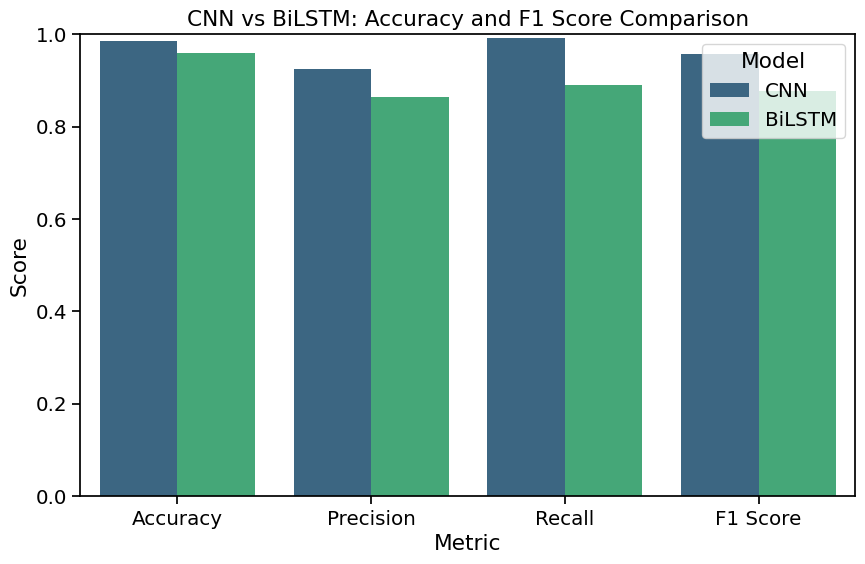

In [ ]:
# Visualize the comparison for CNN and BiLSTM
comparison_melted = comparison_df.reset_index().melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='Model', data=comparison_melted, palette='viridis')
plt.title('CNN vs BiLSTM: Accuracy and F1 Score Comparison')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

# Save the best deep learning model

In [ ]:
# Save the best deep learning model

# Find the model with the highest Accuracy among deep learning models
best_dl_model_row = dl_results_df.sort_values(by='Accuracy', ascending=False).iloc[0]
best_dl_model_name = best_dl_model_row['Model']

print(f"\nBest Deep Learning Model based on Accuracy: {best_dl_model_name}")

# Save the best deep learning model
if best_dl_model_name == 'CNN':
  # Save the trained CNN model
  cnn.save('best_deep_learning_model_cnn.h5')
  print("\n✅ Saved the best deep learning model (CNN) to 'best_deep_learning_model_cnn.h5'")
elif best_dl_model_name == 'BiLSTM':
  # Save the trained BiLSTM model
  bilstm.save('best_deep_learning_model_bilstm.h5')
  print("\n✅ Saved the best deep learning model (BiLSTM) to 'best_deep_learning_model_bilstm.h5'")
elif best_dl_model_name == 'DistilBERT':
  # Save the trained DistilBERT model
  # The trainer object has a save_model method
  trainer.save_model('best_deep_learning_model_distilbert')
  print("\n✅ Saved the best deep learning model (DistilBERT) to 'best_deep_learning_model_distilbert'")
else:
  print("Could not identify the best deep learning model to save.")


NameError: name 'dl_results_df' is not defined

# Grand comparison

In [ ]:
# Compare between all models till now

classical_comparison = results_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']].copy()

dl_comparison = dl_results_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']].copy()

grand_comparison_df = pd.concat([classical_comparison, dl_comparison], ignore_index=True)

print("\n🏆 Grand Comparison of All Models (Classical ML and Deep Learning):")
print(grand_comparison_df.sort_values(by='F1 Score', ascending=False))



🏆 Grand Comparison of All Models (Classical ML and Deep Learning):
    Model  Accuracy  Precision    Recall  F1 Score
8     CNN  0.985294   0.923954  0.991837  0.956693
0      LR  0.969920   0.920168  0.893878  0.906832
9  BiLSTM  0.959225   0.865079  0.889796  0.877264
7  Voting  0.949198   0.982857  0.702041  0.819048
1      NB  0.928476   0.730000  0.893878  0.803670
3     SVM  0.941845   0.959302  0.673469  0.791367
2      DT  0.927807   0.772908  0.791837  0.782258
6      RF  0.932487   0.986486  0.595918  0.743003
4     Ada  0.892380   0.988372  0.346939  0.513595
5     KNN  0.856952   0.792453  0.171429  0.281879


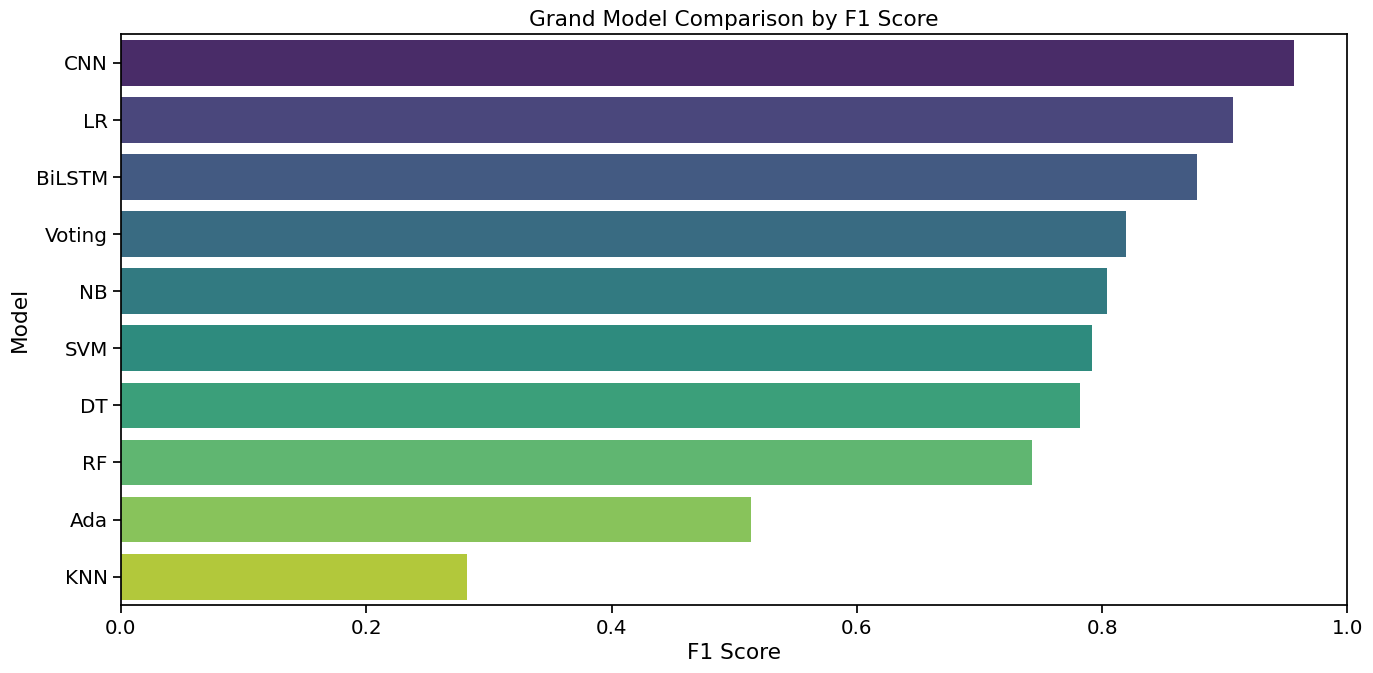

In [ ]:
# Visualize the grand comparison by F1 Score
plt.figure(figsize=(14, 7))
sns.barplot(x='F1 Score', y='Model', data=grand_comparison_df.sort_values(by='F1 Score', ascending=False), palette='viridis')
plt.title('Grand Model Comparison by F1 Score')
plt.xlabel('F1 Score')
plt.ylabel('Model')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


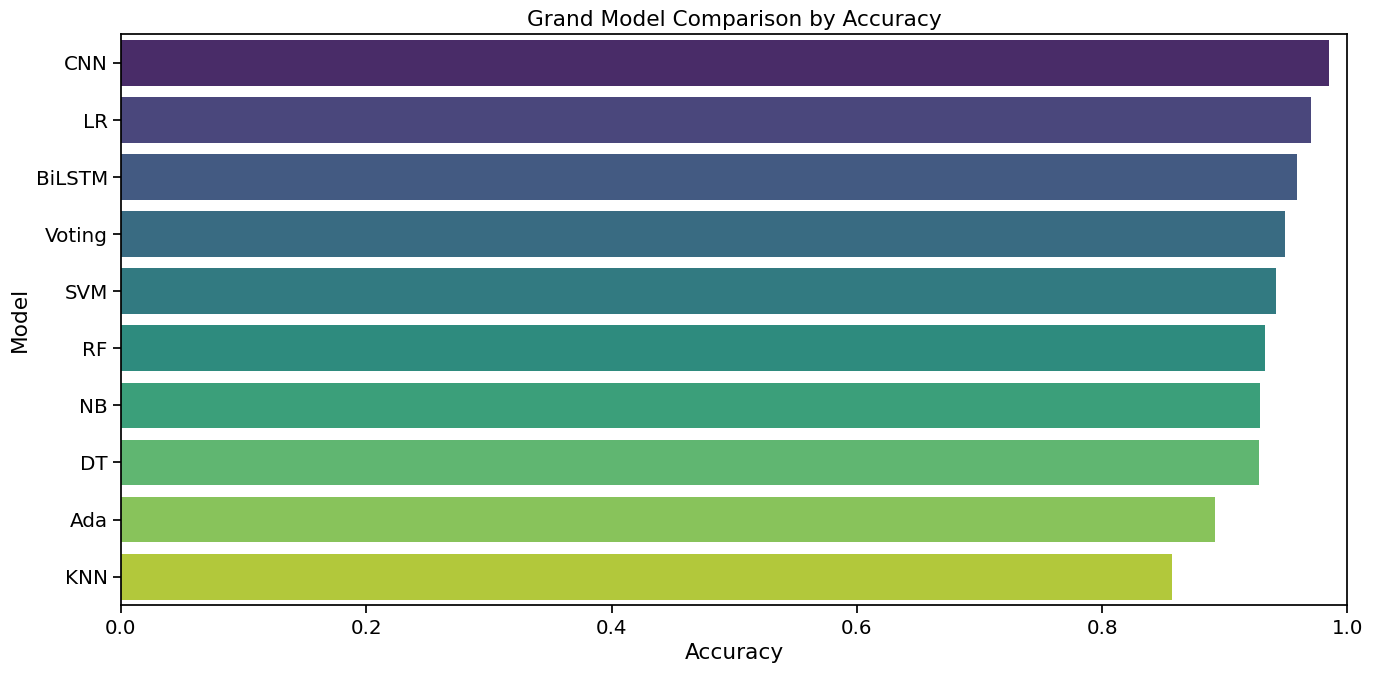

In [ ]:
# Visualize the grand comparison by Accuracy
plt.figure(figsize=(14, 7))
sns.barplot(x='Accuracy', y='Model', data=grand_comparison_df.sort_values(by='Accuracy', ascending=False), palette='viridis')
plt.title('Grand Model Comparison by Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


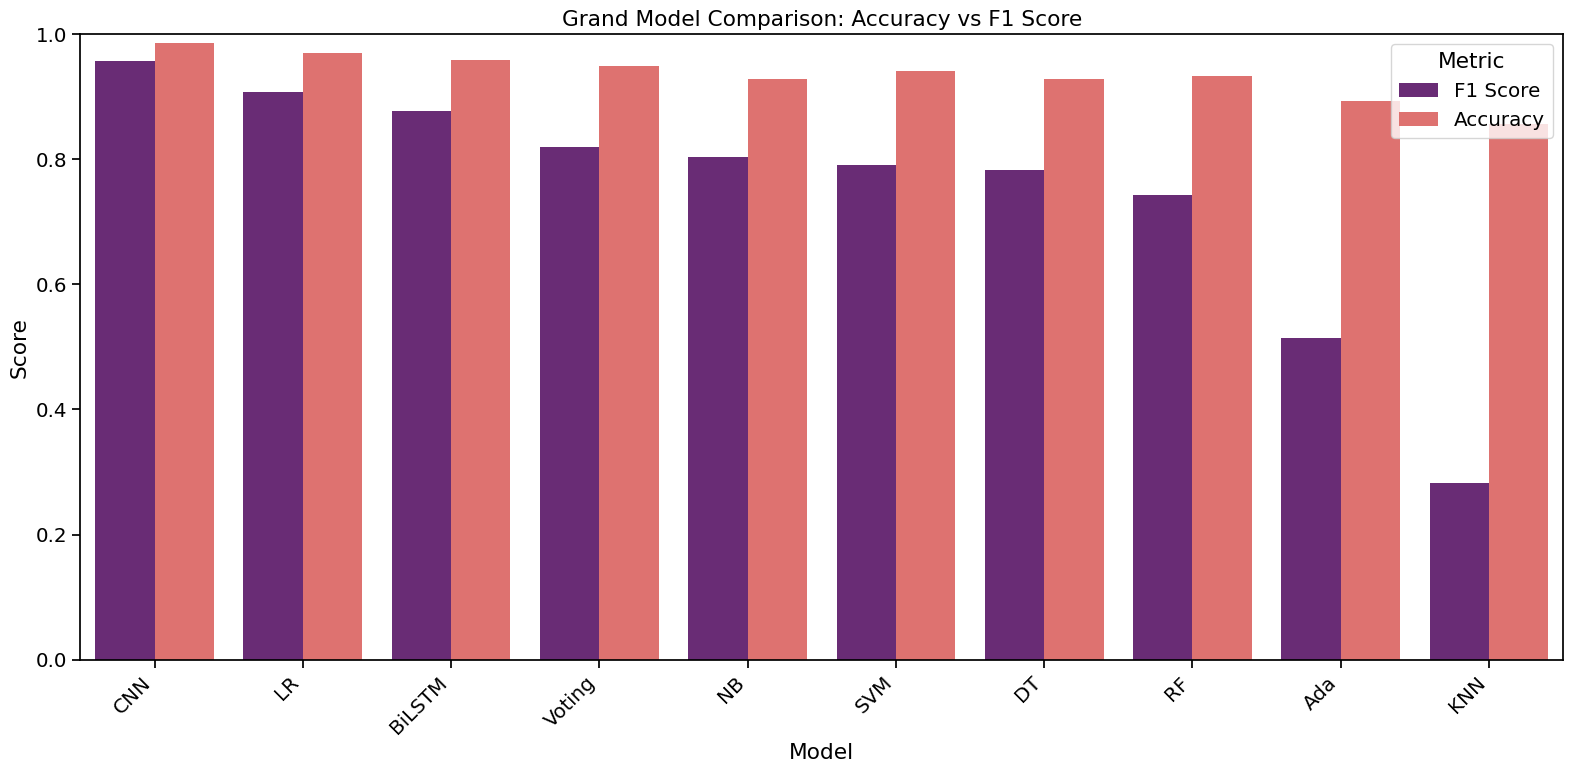

In [ ]:
# Optional: Visualize side-by-side comparison of key metrics (Accuracy, F1)
grand_comparison_melted = grand_comparison_df.melt(id_vars='Model', value_vars=['Accuracy', 'F1 Score'], var_name='Metric', value_name='Score')

plt.figure(figsize=(16, 8))
sns.barplot(x='Model', y='Score', hue='Metric', data=grand_comparison_melted.sort_values(by=['Metric', 'Score'], ascending=[False, False]), palette='magma')
plt.title('Grand Model Comparison: Accuracy vs F1 Score')
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


# Distil BERT is the Clear winner with 97.8% Accuracy and 96.1% F1-score


# --- END ---
---

